   # PROTUGUESE_BANK_PROJECT_1

# DOMAIN ANALYSIS

## INPUT VARIABLES:

### ATTRIBUTES INFORMATION:

#### 1 - age (numeric)

#### 2 - job : type of job (categorical: &#39;admin.&#39;,&#39;blue-collar&#39;,&#39;entrepreneur&#39;,&#39;housemaid&#39;,&#39;management&#39;,&#39;retired&#39;,&#39;self-employed&#39;,&#39;services&#39;,&#39;student&#39;,&#39;technician&#39;,&#39;unemployed&#39;,&#39;unknown&#39;)

#### 3 - marital : marital status (categorical: &#39;divorced&#39;,&#39;married&#39;,&#39;single&#39;,&#39;unknown&#39;; note:&#39;divorced&#39; means divorced or widowed)

#### 4 - education (categorical:&#39;basic.4y&#39;,&#39;basic.6y&#39;,&#39;basic.9y&#39;,&#39;high.school&#39;,&#39;illiterate&#39;,&#39;professional.course&#39;,&#39;university.degree&#39;,&#39;unknown&#39;)

#### 5 - default: has credit in default? (categorical: &#39;no&#39;,&#39;yes&#39;,&#39;unknown&#39;)

#### 6 - housing: has housing loan? (categorical: &#39;no&#39;,&#39;yes&#39;,&#39;unknown&#39;)

#### 7 - loan: has personal loan? (categorical: &#39;no&#39;,&#39;yes&#39;,&#39;unknown&#39;)

### Related with the last contact of the current campaign:

#### 8 - contact: contact communication type (categorical: &#39;cellular&#39;,&#39;telephone&#39;)

#### 9 - month: last contact month of year (categorical: &#39;jan&#39;, &#39;feb&#39;, &#39;mar&#39;, ..., &#39;nov&#39;, &#39;dec&#39;)

#### 10 - day_of_week: last contact day of the week (categorical: &#39;mon&#39;,&#39;tue&#39;,&#39;wed&#39;,&#39;thu&#39;,&#39;fri&#39;)

#### 11 - duration: last contact duration, in seconds (numeric). Important note: this attributehighly affects the output target (e.g., if duration=0 then y=&#39;no&#39;). Yet, the duration is notknown before a call is performed. Also, after the end of the call y is obviously known.Thus, this input should only be included for benchmark purposes and should bediscarded if the intention is to have a realistic predictive model.

### Other Attributes:

#### 12 - campaign: number of contacts performed during this campaign and for this client(numeric, includes last contact)

#### 13 - pdays: number of days that passed by after the client was last contacted from aprevious campaign (numeric; 999 means client was not previously contacted)

#### 14 - previous: number of contacts performed before this campaign and for this client(numeric)

#### 15 - poutcome: outcome of the previous marketing campaign (categorical:&#39;failure&#39;,&#39;nonexistent&#39;,&#39;success&#39;)

### Social and economic context attributes:

#### 16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

#### 17 - cons.price.idx: consumer price index - monthly indicator (numeric)

#### 18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)

#### 19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

#### 20 - nr.employed: number of employees - quarterly indicator (numeric)

## OUTPUT VARIABLES(Desired target):

#### 21 - y - has the client subscribed a term deposit? (binary: &#39;yes&#39;,&#39;no&#39;)

In [1]:
# importing libraries

import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('bank-additional-full.csv', sep=';')

## BASICS CHECK

In [3]:
data.head() # it give top 5 data 

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

In [4]:
data.tail() # it's give last 5 rows

age          job  marital            education default housing loan  \
41183   73      retired  married  professional.course      no     yes   no   
41184   46  blue-collar  married  professional.course      no      no   no   
41185   56      retired  married    university.degree      no     yes   no   
41186   44   technician  married  professional.course      no      no   no   
41187   74      retired  married  professional.course      no     yes   no   

        contact month day_of_week  ...  campaign  pdays  previous  \
41183  cellular   nov         fri  ...         1    999         0   
41184  cellular   nov         fri  ...         1    999         0   
41185  cellular   nov         fri  ...         2    999         0   
41186  cellular   nov         fri  ...         1    999         0   
41187  cellular   nov         fri  ...         3    999         1   

          poutcome emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
41183  nonexistent         -1.1          94.767          -50.8      1.028   
41184  nonexistent         -1.1          94.767          -50.8      1.028   
41185  nonexistent         -1.1          94.767          -50.8      1.028   
41186  nonexistent         -1.1          94.767          -50.8      1.028   
41187      failure         -1.1          94.767          -50.8      1.028   

       nr.employed    y  
41183       4963.6  yes  
41184       4963.6   no  
41185       4963.6   no  
41186       4963.6  yes  
41187       4963.6   no  

[5 rows x 21 columns]

In [5]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

#### Replacing the categorical data of y to numerical

In [6]:
data['y'] = data['y'].replace({'yes':1, 'no':0})  # here replacing categorical to numerical
data['y'] = data['y'].astype('int64')
data

age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact month day_of_week  ...  campaign  pdays  previous  \
0      telephone   may         mon  ...         1    999         0   
1      telephone   may         mon  ...         1    999         0   
2      telephone   may         mon  ...         1    999         0   
3      telephone   may         mon  ...         1    999         0   
4      telephone   may         mon  ...         1    999         0   
...          ...   ...         ...  ...       ...    ...       ...   
41183   cellular   nov         fri  ...         1    999         0   
41184   cellular   nov         fri  ...         1    999         0   
41185   cellular   nov         fri  ...         2    999         0   
41186   cellular   nov         fri  ...         1    999         0   
41187   cellular   nov         fri  ...         3    999         1   

          poutcome emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
0      nonexistent          1.1          93.994          -36.4      4.857   
1      nonexistent          1.1          93.994          -36.4      4.857   
2      nonexistent          1.1          93.994          -36.4      4.857   
3      nonexistent          1.1          93.994          -36.4      4.857   
4      nonexistent          1.1          93.994          -36.4      4.857   
...            ...          ...             ...            ...        ...   
41183  nonexistent         -1.1          94.767          -50.8      1.028   
41184  nonexistent         -1.1          94.767          -50.8      1.028   
41185  nonexistent         -1.1          94.767          -50.8      1.028   
41186  nonexistent         -1.1          94.767          -50.8      1.028   
41187      failure         -1.1          94.767          -50.8      1.028   

       nr.employed  y  
0           5191.0  0  
1           5191.0  0  
2           5191.0  0  
3           5191.0  0  
4           5191.0  0  
...            ... ..  
41183       4963.6  1  
41184       4963.6  0  
41185       4963.6  0  
41186       4963.6  1  
41187       4963.6  0  

[41188 rows x 21 columns]

### I will also rename some columns replacing a dot by underscores

In [7]:
data.rename(columns= {'emp.var.rate':'emp_var_rate', 'cons.price.idx': 'cons_price_idx', 'cons.conf.idx':'cons_conf_idx',
                      'nr.employed':'nr_employed'}, inplace = True)

In [8]:
data.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp_var_rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons_price_idx  cons_conf_idx  euribor3m  nr_employed  y  
0          93.994          -36.4      4.857       5191.0  0  
1          93.994          -36.4      4.857       5191.0  0  
2          93.994          -36.4      4.857       5191.0  0  
3          93.994          -36.4      4.857       5191.0  0  
4          93.994          -36.4      4.857       5191.0  0  

[5 rows x 21 columns]

In [9]:
data.describe()  # it's give numerical data here, we find std, mean, median, min and max values

age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp_var_rate  cons_price_idx  cons_conf_idx     euribor3m  \
count  41188.000000    41188.000000   41188.000000  41188.000000   
mean       0.081886       93.575664     -40.502600      3.621291   
std        1.570960        0.578840       4.628198      1.734447   
min       -3.400000       92.201000     -50.800000      0.634000   
25%       -1.800000       93.075000     -42.700000      1.344000   
50%        1.100000       93.749000     -41.800000      4.857000   
75%        1.400000       93.994000     -36.400000      4.961000   
max        1.400000       94.767000     -26.900000      5.045000   

        nr_employed             y  
count  41188.000000  41188.000000  
mean    5167.035911      0.112654  
std       72.251528      0.316173  
min     4963.600000      0.000000  
25%     5099.100000      0.000000  
50%     5191.000000      0.000000  
75%     5228.100000      0.000000  
max     5228.100000      1.000000

In [10]:
data.describe(include='O') # here, we describe categorical data

job  marital          education default housing   loan   contact  \
count    41188    41188              41188   41188   41188  41188     41188   
unique      12        4                  8       3       3      3         2   
top     admin.  married  university.degree      no     yes     no  cellular   
freq     10422    24928              12168   32588   21576  33950     26144   

        month day_of_week     poutcome  
count   41188       41188        41188  
unique     10           5            3  
top       may         thu  nonexistent  
freq    13769        8623        35563

In [11]:
data.info(), # Describing datatypes, entries and non-null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

(None,)

#### here, no null values

In [12]:
data.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
y                   int64
dtype: object

In [13]:
data.shape #  describing how many rows and columns. here, 41188 are rows and 21 are columns

(41188, 21)

In [14]:
data.duplicated().sum() # describing duplicate

12

#### I must conclude that these apparent duplicated samples are actually from people with an identical profile.

In [15]:
data.y.value_counts()[0] # Number of client that haven't subscribed the term deposit

36548

In [16]:
data.y.value_counts()[1] # Number of clients that have subscribed the term deposit

4640

#### [0] Number of clients that haven’t subscribed the term deposit: 36548

#### [1] Number of clients that have subscribed the term deposit: 4640

## *After basics check, we do exploratory data analysis to see didtribution of data through different graph

## EXPLORATORY DATA ANALYSIS

### Univariate Analysis

In [17]:
data.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp_var_rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons_price_idx  cons_conf_idx  euribor3m  nr_employed  y  
0          93.994          -36.4      4.857       5191.0  0  
1          93.994          -36.4      4.857       5191.0  0  
2          93.994          -36.4      4.857       5191.0  0  
3          93.994          -36.4      4.857       5191.0  0  
4          93.994          -36.4      4.857       5191.0  0  

[5 rows x 21 columns]

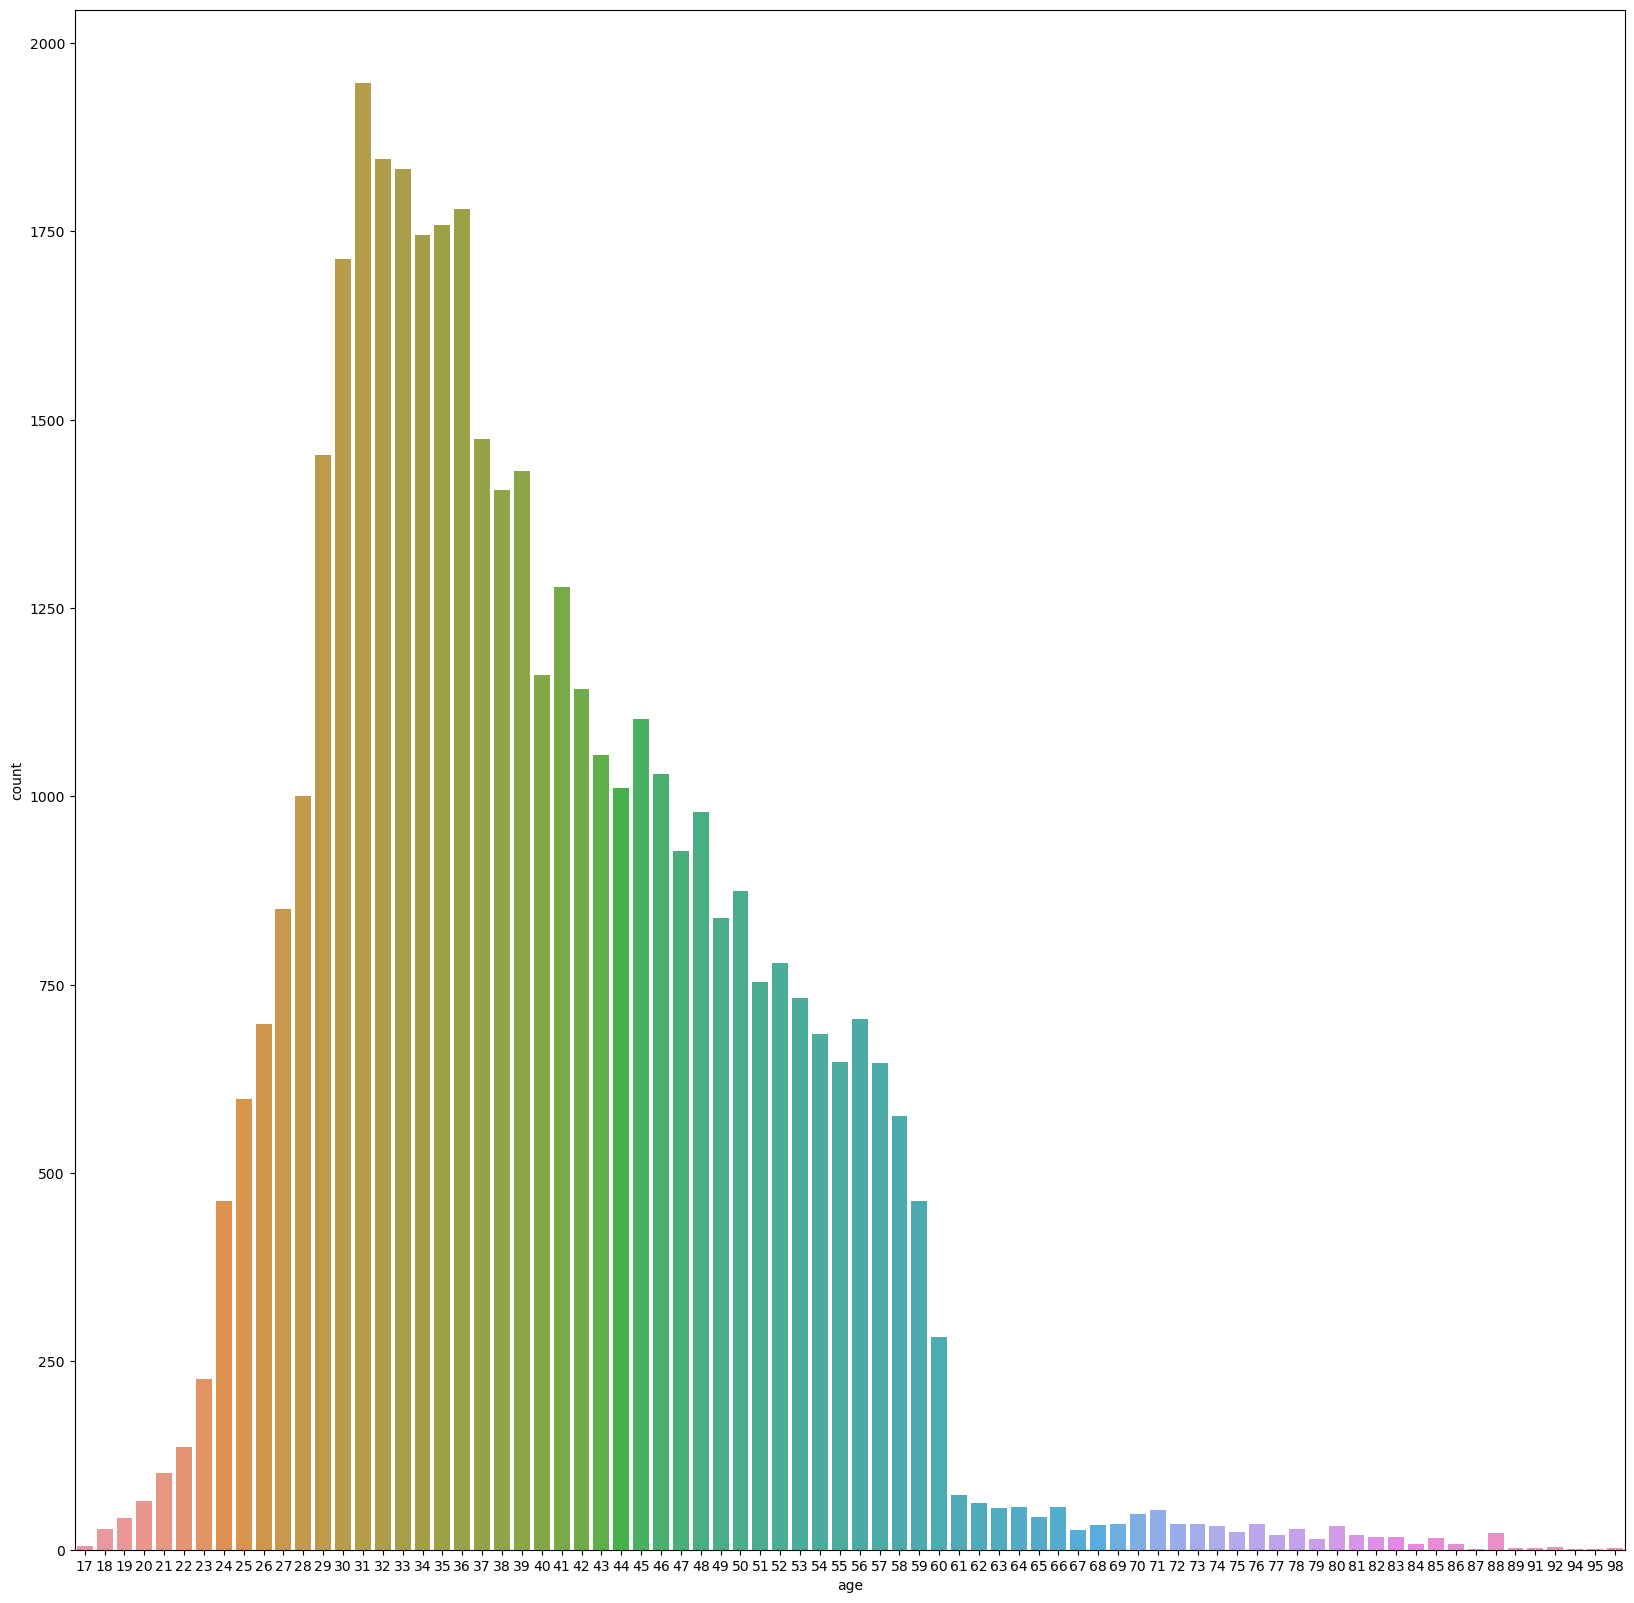

In [18]:
# Analyzing a age through univariate
plt.figure(figsize=(20,20))
sns.countplot(x=data['age'], data=data)
plt.show()

In [19]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

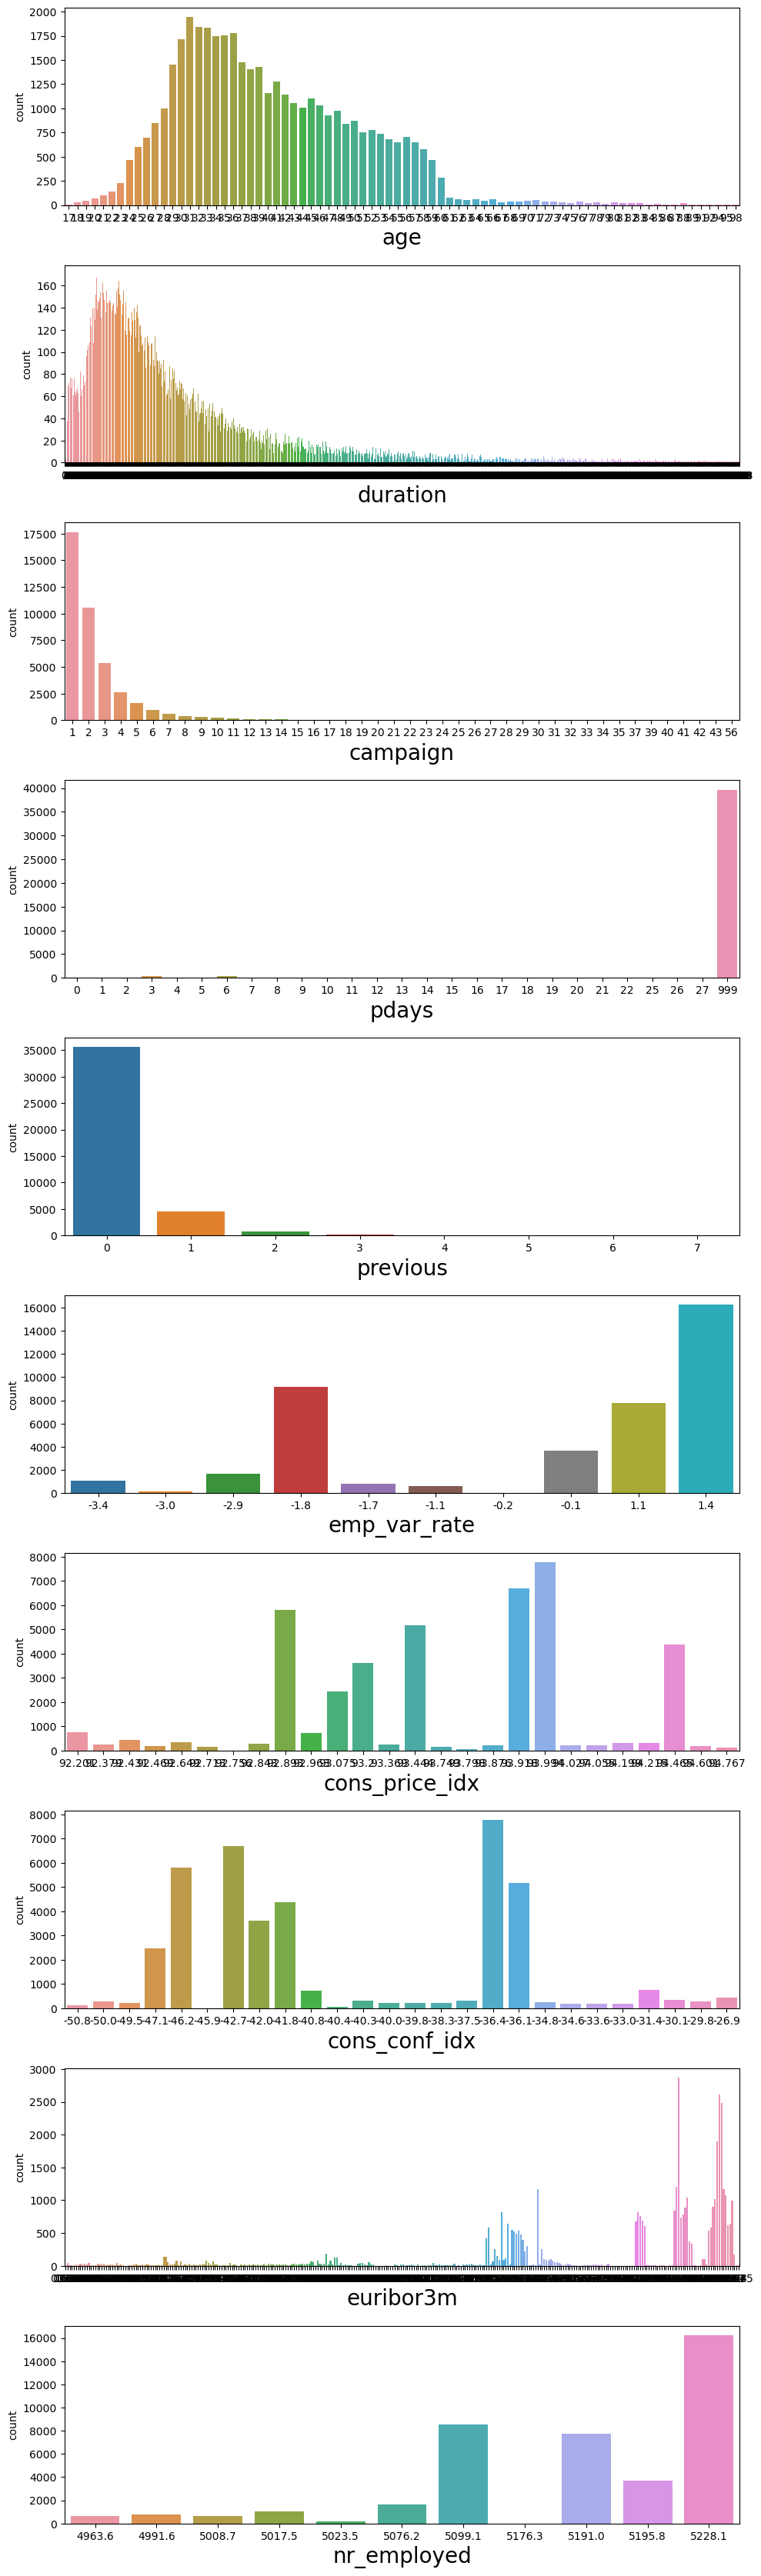

In [20]:
# Analyzing the all numerical columns using histplot

import warnings
warnings.filterwarnings('ignore')
data1=data[['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate','cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed','y']]
plt.figure(figsize=(10,100),facecolor="white")
plotnumber=1
for column in data1:
    
    if plotnumber<=10:
        
        ax=plt.subplot(30,1,plotnumber)
        sns.countplot(x=data1[column])
        plt.xlabel(column,fontsize=20)
        
        
    plotnumber+=1
plt.tight_layout()
plt.show()

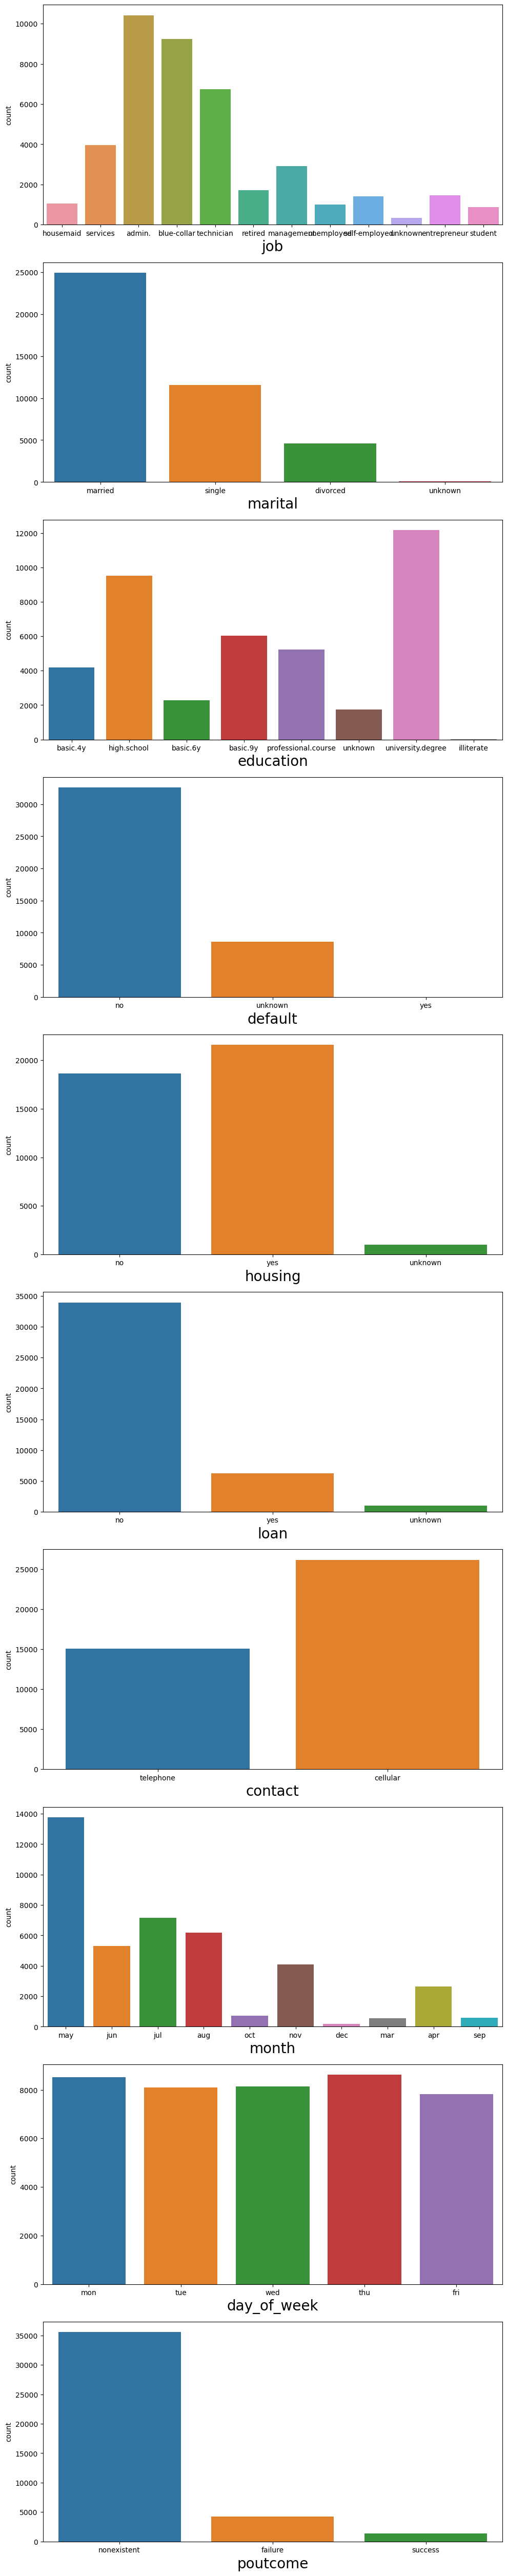

In [21]:
# analyze the categorical column using histplot 
import warnings
warnings.filterwarnings('ignore')
data2=data[['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']]
plt.figure(figsize=(10,100), facecolor= 'white')
plotnumber=1

for column in data2:
    if plotnumber<=11:
        ax=plt.subplot(20,1, plotnumber)
        sns.countplot(x=data2[column])
        plt.xlabel(column, fontsize=20)
        
    plotnumber+=1
    
plt.tight_layout()
plt.show()

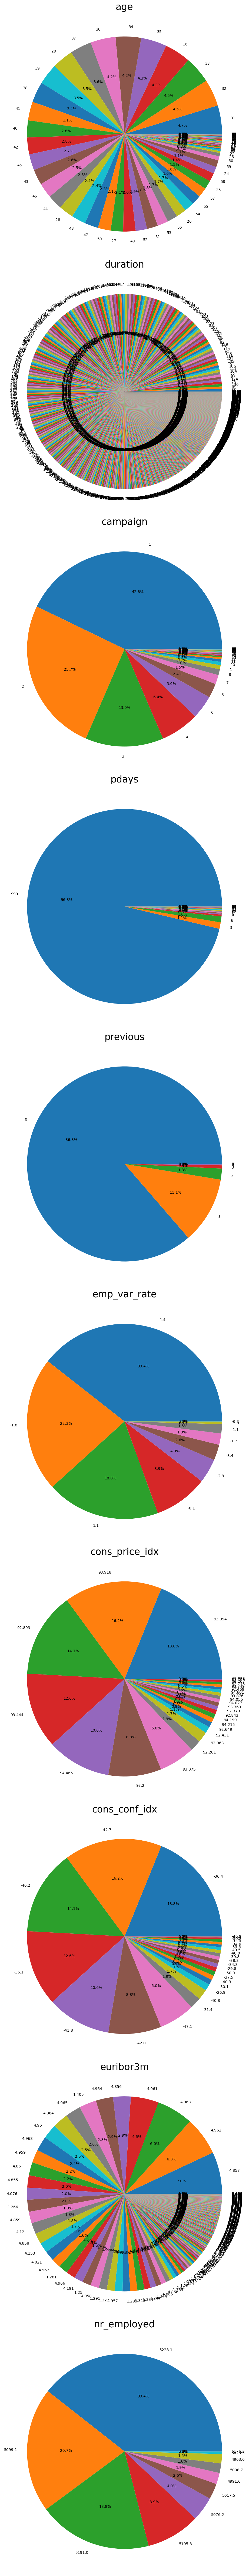

In [22]:
# Analyzing the numerical data using pieolot
data1 = data[['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate','cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed','y']]
plt.figure(figsize=(200,200))
plotnumber=1

for column in data1:
    if plotnumber <= 10:
        ax = plt.subplot(21,1, plotnumber)
        ax.pie(data1[column].value_counts(normalize=True), labels=data[column].value_counts().index,autopct='%1.1f%%')
        ax.set_title(column,fontsize=25)
    plotnumber+=1
plt.tight_layout()
plt.show()

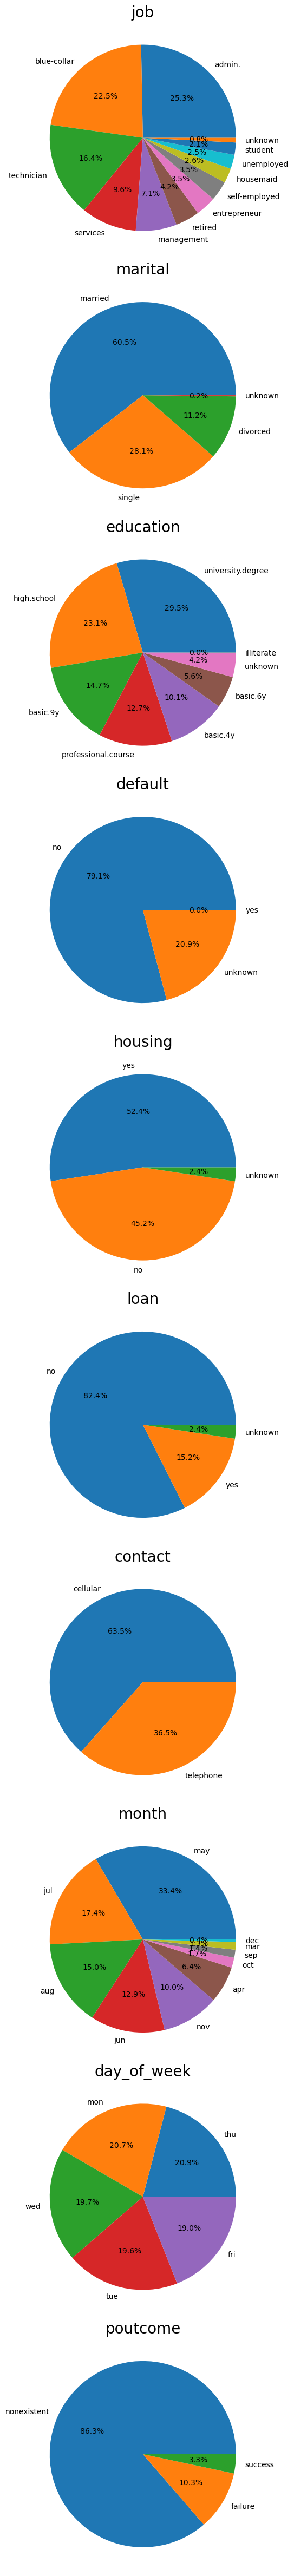

In [23]:
# Analyzing categorical data using pieplot
data2=data[['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']]
plt.figure(figsize=(100,100))
plotnumber=1

for column in data2:
    if plotnumber<=10:
        ax = plt.subplot(21,1, plotnumber)
        ax.pie(data2[column].value_counts(normalize=True), labels=data[column].value_counts().index, autopct='%1.1f%%')
        ax.set_title(column, fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

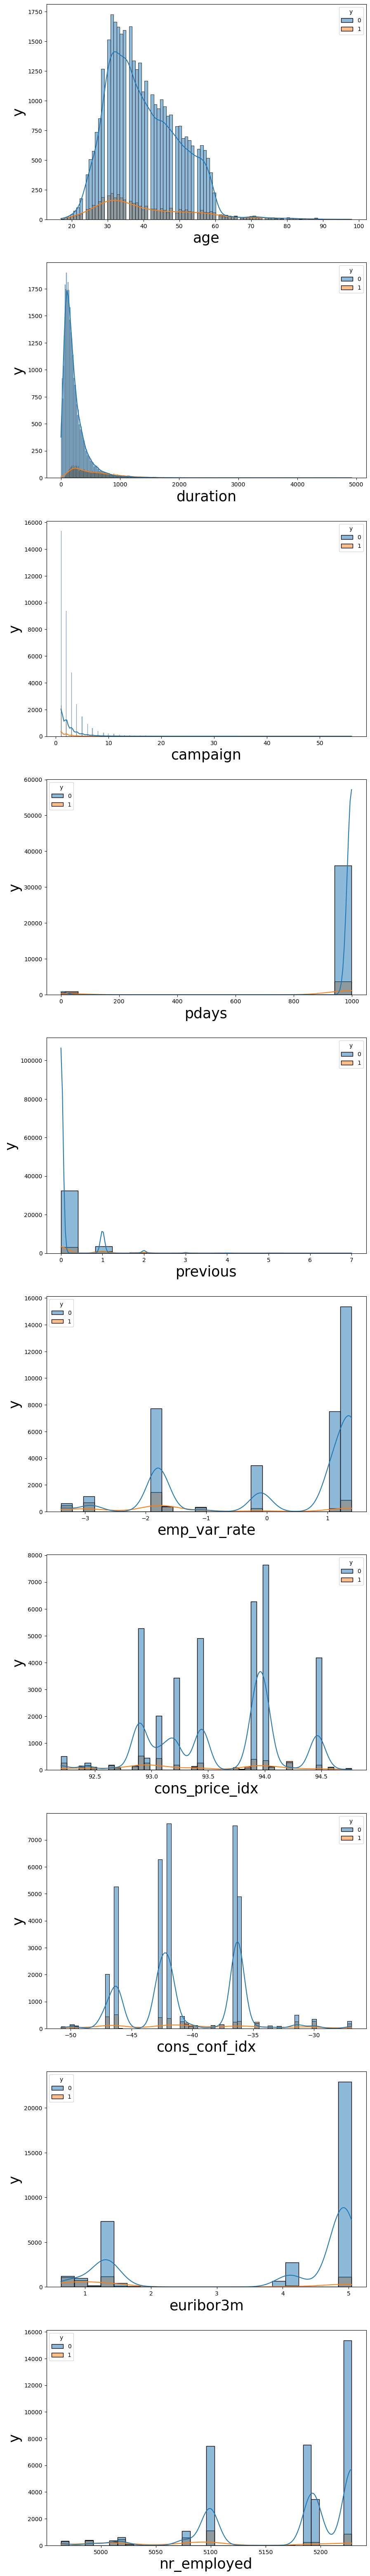

In [24]:
# Analysing the numerical data using histplot
import warnings
warnings.filterwarnings('ignore')
data1=data[['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate','cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed','y']]
plt.figure(figsize=(10,80))
plotnumber=1

for column in data1:
    if plotnumber <=10:
        ax=plt.subplot(10,1, plotnumber)
        sns.histplot(x=data1[column], hue=data.y, kde=True)
        plt.xlabel(column, fontsize=25)
        plt.ylabel('y', fontsize=25)
    plotnumber+=1
plt.show()

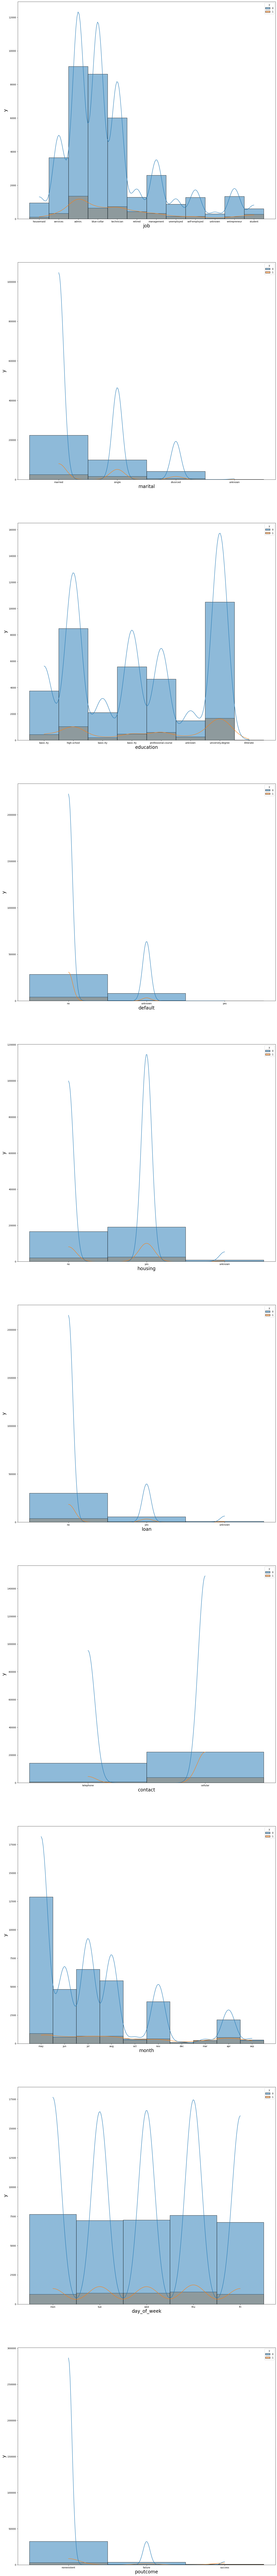

In [25]:
# Analyzing categorical data using histplot
data2=data[['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']]
plt.figure(figsize=(20,200))
plotnumber=1

for column in data2:
    if plotnumber<=10:
        ax=plt.subplot(10,1,plotnumber)
        sns.histplot(x=data2[column], kde=True, hue=data.y)
        plt.xlabel(column, fontsize=20)
        plt.ylabel('y', fontsize=20)
    plotnumber+=1
plt.show()

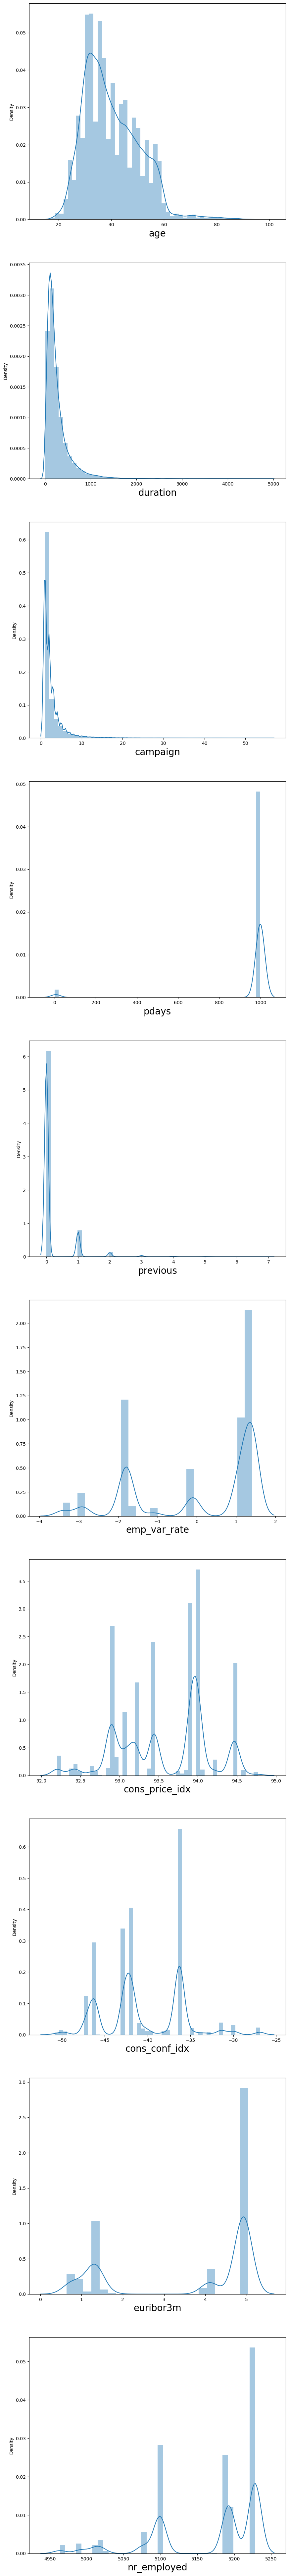

In [26]:
# Analyzing Numerical analysis using distplot
plt.figure(figsize=(10,100), facecolor='white')
data1=data[['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate','cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed','y']]
plotnumber=1

for column in data1:
    if plotnumber<=10:
        ax=plt.subplot(10,1, plotnumber)
        sns.distplot(x=data1[column])
        plt.xlabel(column, fontsize=20)
    plotnumber+=1
plt.show()

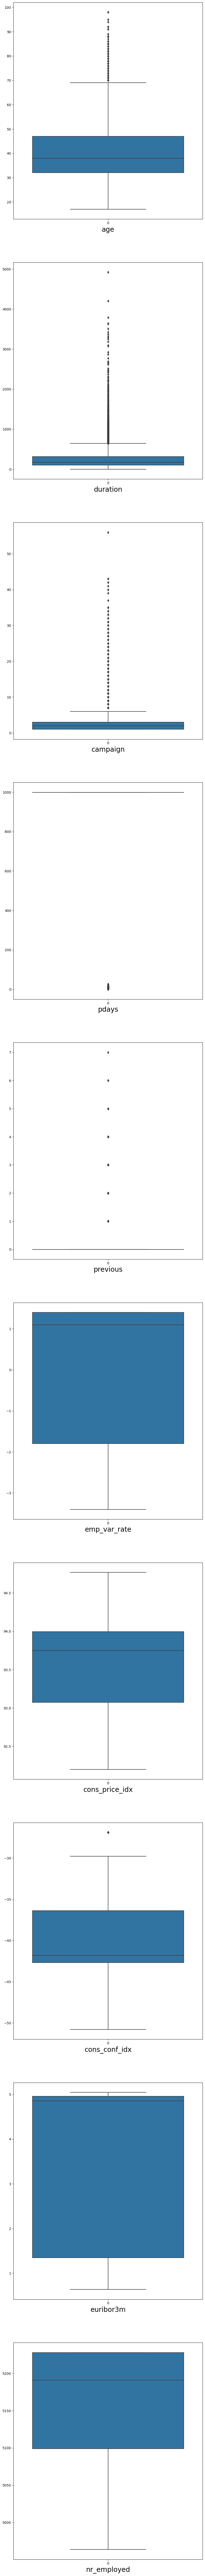

In [27]:
# Checking outliers using boxplot
import warnings
warnings.filterwarnings('ignore')
data1=data[['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate','cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed']]
plt.figure(figsize=(10,150), facecolor='white')
plotnumber=1

for column in data1:
    if plotnumber<=11:
        ax=plt.subplot(11,1, plotnumber)
        sns.boxplot(data1[column])
        plt.xlabel(column, fontsize=20)
    plotnumber+=1
plt.show()

In [28]:
!pip install sweetviz

In [29]:
import sweetviz as sv
my_report=sv.analyze(data)
my_report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## BIVARIATE ANALYSIS

In [30]:
data

age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact month day_of_week  ...  campaign  pdays  previous  \
0      telephone   may         mon  ...         1    999         0   
1      telephone   may         mon  ...         1    999         0   
2      telephone   may         mon  ...         1    999         0   
3      telephone   may         mon  ...         1    999         0   
4      telephone   may         mon  ...         1    999         0   
...          ...   ...         ...  ...       ...    ...       ...   
41183   cellular   nov         fri  ...         1    999         0   
41184   cellular   nov         fri  ...         1    999         0   
41185   cellular   nov         fri  ...         2    999         0   
41186   cellular   nov         fri  ...         1    999         0   
41187   cellular   nov         fri  ...         3    999         1   

          poutcome emp_var_rate  cons_price_idx  cons_conf_idx  euribor3m  \
0      nonexistent          1.1          93.994          -36.4      4.857   
1      nonexistent          1.1          93.994          -36.4      4.857   
2      nonexistent          1.1          93.994          -36.4      4.857   
3      nonexistent          1.1          93.994          -36.4      4.857   
4      nonexistent          1.1          93.994          -36.4      4.857   
...            ...          ...             ...            ...        ...   
41183  nonexistent         -1.1          94.767          -50.8      1.028   
41184  nonexistent         -1.1          94.767          -50.8      1.028   
41185  nonexistent         -1.1          94.767          -50.8      1.028   
41186  nonexistent         -1.1          94.767          -50.8      1.028   
41187      failure         -1.1          94.767          -50.8      1.028   

       nr_employed  y  
0           5191.0  0  
1           5191.0  0  
2           5191.0  0  
3           5191.0  0  
4           5191.0  0  
...            ... ..  
41183       4963.6  1  
41184       4963.6  0  
41185       4963.6  0  
41186       4963.6  1  
41187       4963.6  0  

[41188 rows x 21 columns]

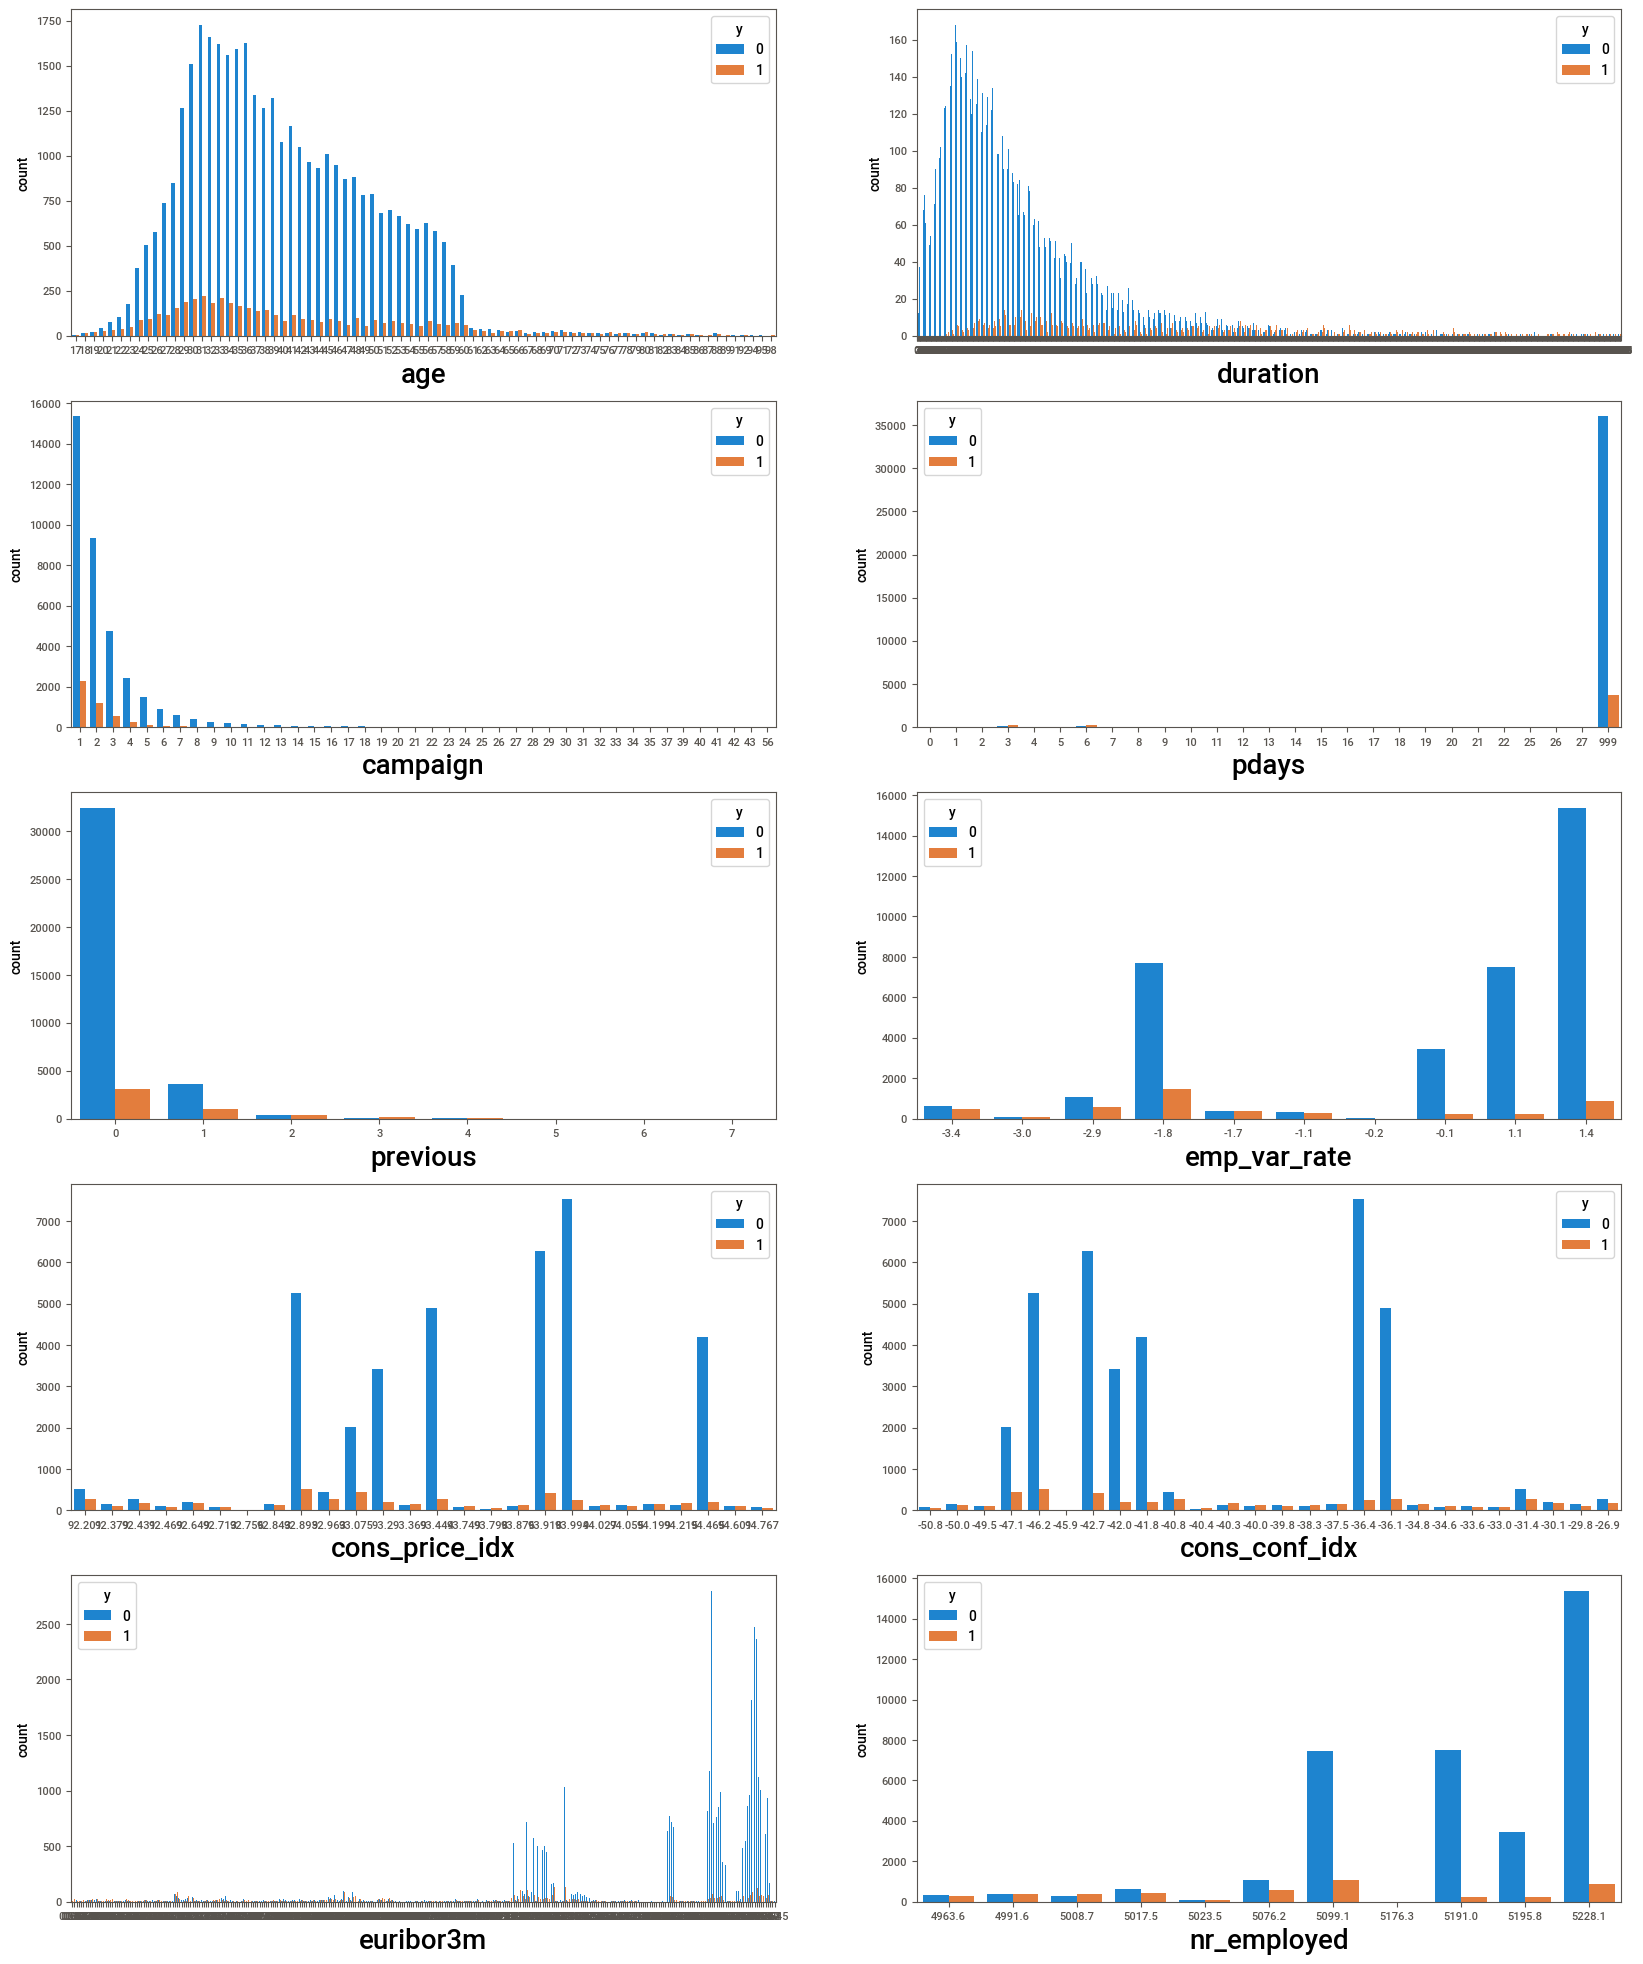

In [31]:
# Bivariate analyzing using countplot
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(20,50), facecolor='white')
data1=data[['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate','cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed']]
plotnumber=1

for column in data1:
    if plotnumber<=11:
        ax=plt.subplot(10,2, plotnumber)
        sns.countplot(x=data1[column], hue=data['y'])
        plt.xlabel(column, fontsize=20)
    plotnumber+=1
plt.show()

## MULTIVARIATE ANALYSIS

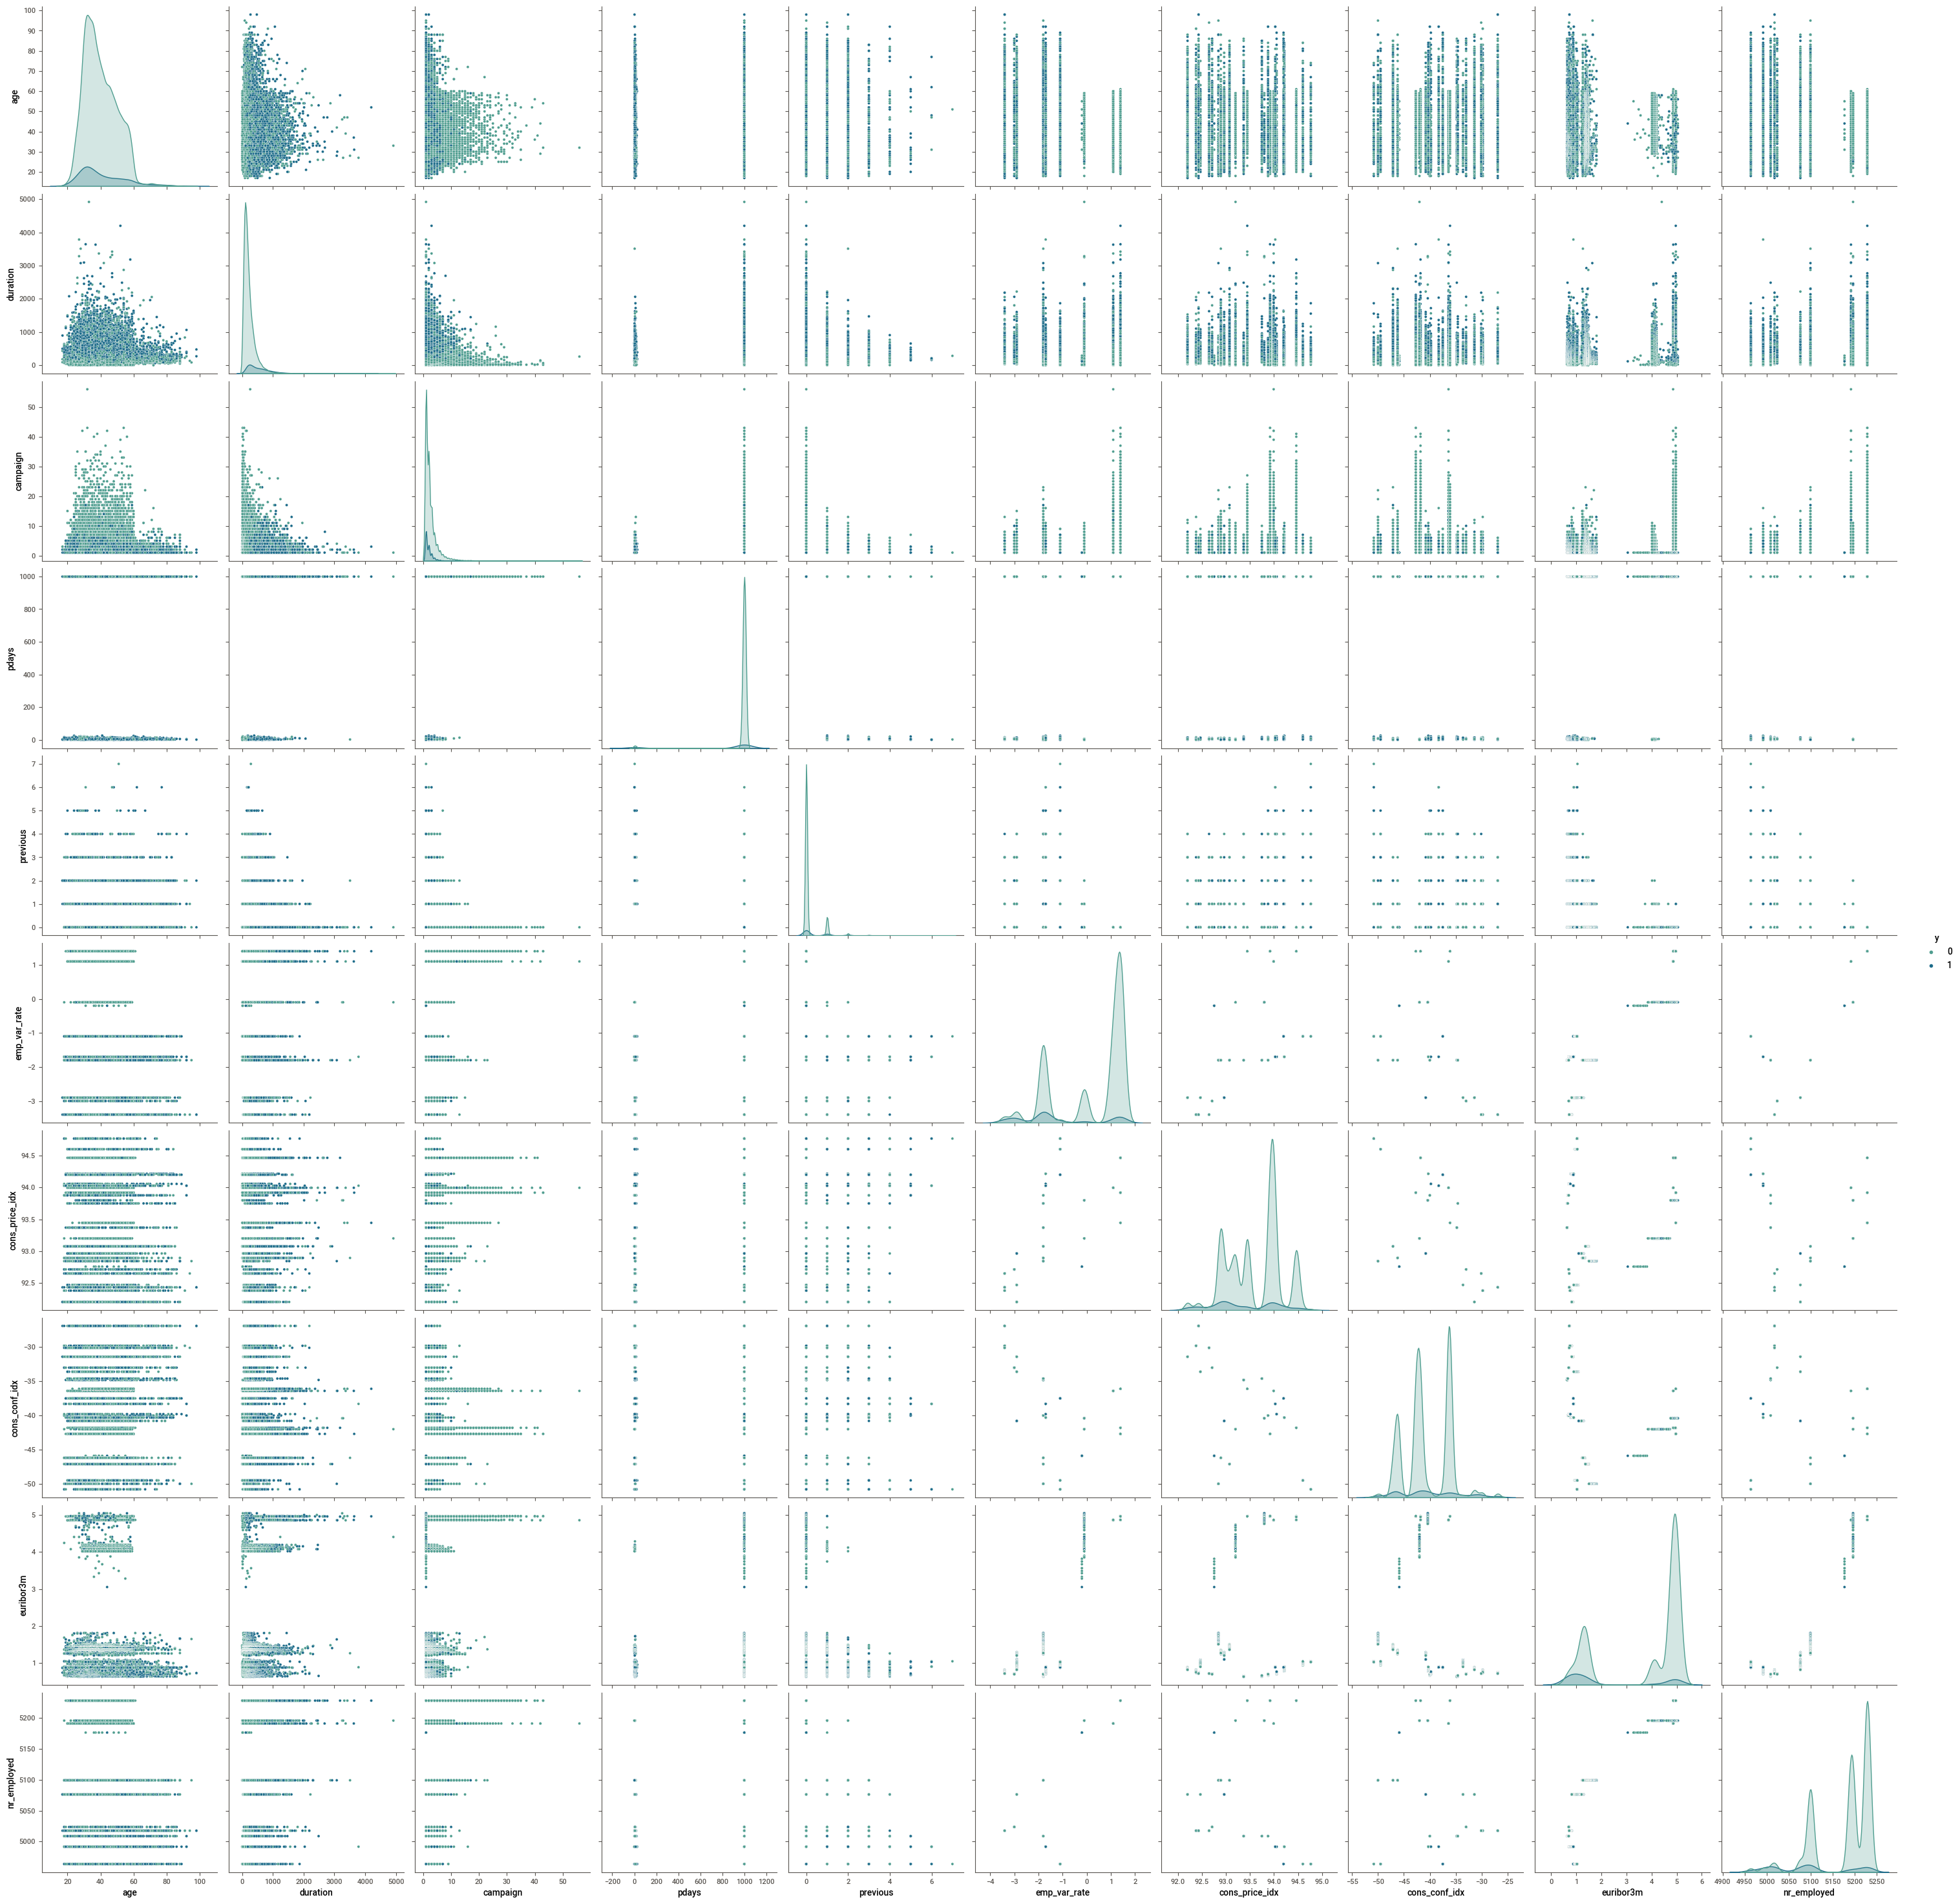

In [32]:
sns.pairplot(data,hue='y',palette='crest', size=3)

# INSIGHTS IN THE EDA(Exploratory Data Analysis

### Types of data 

#### Variable types:-

#### Numeric:-['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate','cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed' 'y'] 

#### Categorical:-['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

## The information is written on the basis of EDA and statistical summary

### Age:-

#### The youngest client is 17 year old and the oldest has 98 years with a median of 38 years and the average is 40 years old. The distribution is skewed. This possibly indicates the some outliers.

### Marital:-

#### Marital has 4 unique values. these four are:-(married, divorced,single,unknown). Married people has more subscription i;e 60.5%, single has (28.1%), divorced has (11.2%) and unknown has (0.2%), According to piechart and countplot.

### Education:-

 #### Education has 8 unique values. University_degree student has more subscription i;e (29.5%). the four education levels (university_degree, high_school, basic.9y and proffessional_course)  correspond 80% of the data. clients with 4 basics or illiterate are the oldest and prone to subscribe to the product.

### Default:-

#### The client has no credits have more subscription, the subscription percentage has 79.1% a/c to pie and countplot.

### Housing:-

#### This value has 3 unique value with 'unknown' interpretd as a missing value, representing 2% of observation

### Job:-

#### The 5 most common jobs are enough to represent 80% of the data.The classes ‘admin.’, ‘blue-collar’, ‘technician’, ‘management’ and ‘ services’ are the jobs where most clients had to subscribe but in terms of proportion, ‘student’ and ‘retired’ are the most representative. we see that ‘retired’ and ‘housemaid’ are the oldest clients and the ones who have accepted the subscription more than any of the other classes. its also so that some unknown values.it mean that they are not mention job type.

### Loan:-

#### Loan show high number of non-subscribers.

### Contact:-

#### Acoording to graph the client has more contacted with cellular as compared to other. cellular has 63.5% and telephone has 36.5%

### Month:-

#### May has more number as compaqared to other 12 months. may has 33.4%

### Day_of_week:-

#### Day_of_week has 7 aatributes, Thu has little more as compared to Mon. It's distribution show that there is no outliers and no missing values.

### Duration:-

#### Mostly duration is in seconds. the mean is 258.285 and median is 180. it show that the more difference in between mean and median

### Campaign:-

#### In distribution graph show that skewed in right. Total 56 campaing has done. skewed in grath it show that  outliers presence in campain.

### Pday:-

### The majority of client have 999 number which indicates most people did not contact or not conacted by the bank. Those 999 are cosidered to be out of ranges.

### Previous:-

#### It is about the number of contacts performed before this campaign and for this client

### Poutcome:-

#### Non-existance customer has no subscription is more number.

### Emp_var_rate:-

#### employment variation rate. During the period index varied from  -3.4 to 1.4

### Cons_price_index:-

#### It is about the consumer price index for monthly period. The mean is 93.5757 and median is 93.749. there is only small difference between mean and the median.

### Cons_conf_index:-

#### the consumer confidence level during that period kept always negative with a range of variation of [-51, -27]. These negative values might be explained by the recession that severely affected Portugal due to the financial global crisis during that same period the data was recorded.

### Euribor3m:-

#### mean is 3.6213 and median is 4.857.

### nr.employed:-

#### The number of employed people varied around 200 during the campaign.

###  y:-

#### y represent outcome of data means target of the data.  the term deposit represent the client are subscribe has represent in ('yes' or 'no'. In EDA graph , highest count is no and lowest count is yes.

# DATA PREPROCESSING AND FEATURE ENGINEERING

<Axes: >

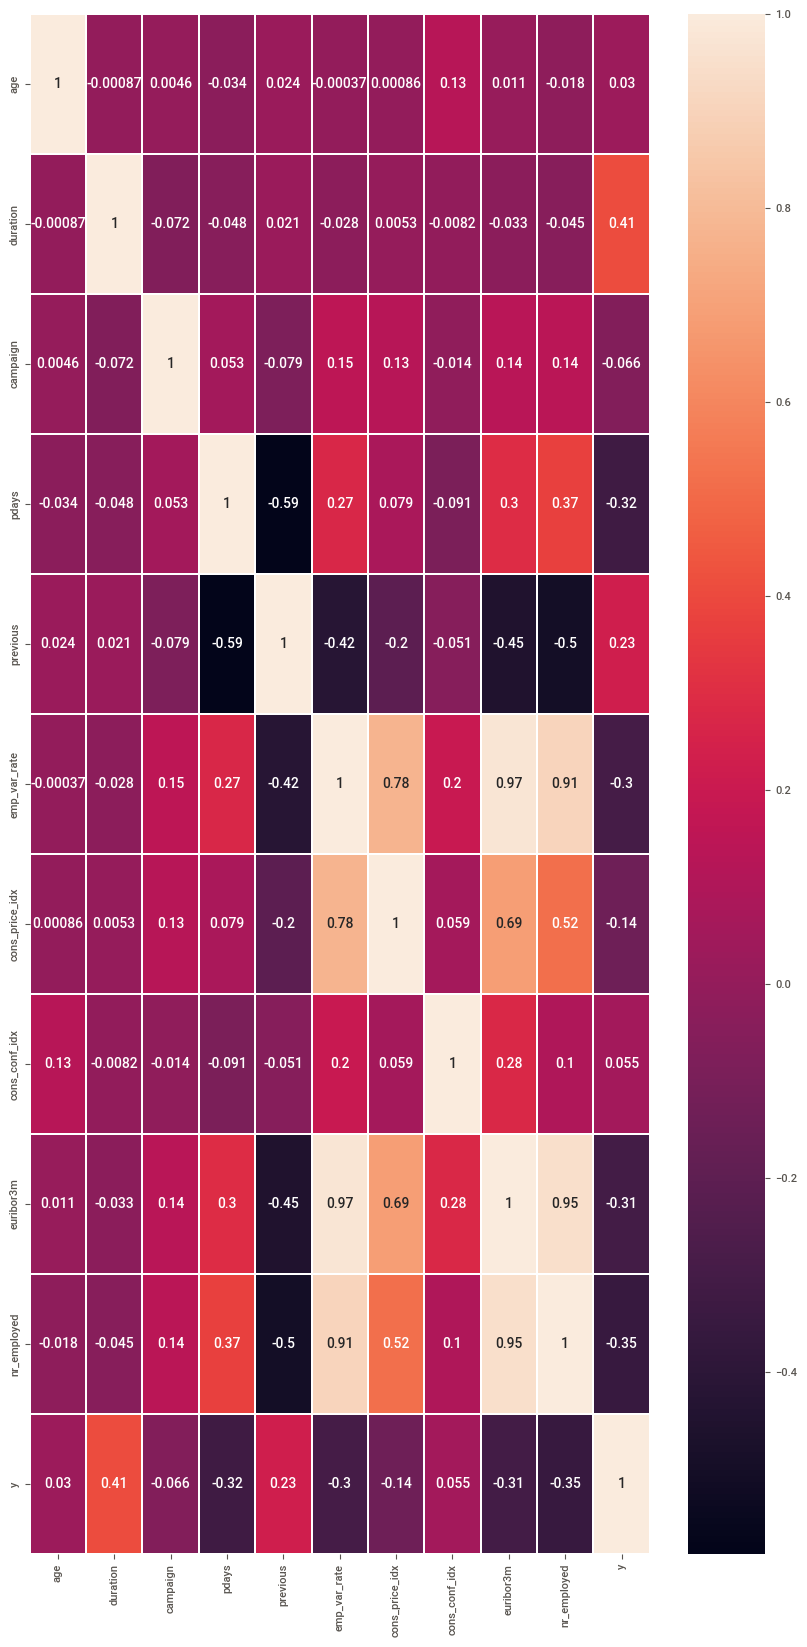

In [33]:
# Checking correlation

plt.figure(figsize=(10,20))
sns.heatmap(data.corr(), annot=True, linewidth=0.03)

In [34]:
data.corr()

age  duration  campaign     pdays  previous  \
age             1.000000 -0.000866  0.004594 -0.034369  0.024365   
duration       -0.000866  1.000000 -0.071699 -0.047577  0.020640   
campaign        0.004594 -0.071699  1.000000  0.052584 -0.079141   
pdays          -0.034369 -0.047577  0.052584  1.000000 -0.587514   
previous        0.024365  0.020640 -0.079141 -0.587514  1.000000   
emp_var_rate   -0.000371 -0.027968  0.150754  0.271004 -0.420489   
cons_price_idx  0.000857  0.005312  0.127836  0.078889 -0.203130   
cons_conf_idx   0.129372 -0.008173 -0.013733 -0.091342 -0.050936   
euribor3m       0.010767 -0.032897  0.135133  0.296899 -0.454494   
nr_employed    -0.017725 -0.044703  0.144095  0.372605 -0.501333   
y               0.030399  0.405274 -0.066357 -0.324914  0.230181   

                emp_var_rate  cons_price_idx  cons_conf_idx  euribor3m  \
age                -0.000371        0.000857       0.129372   0.010767   
duration           -0.027968        0.005312      -0.008173  -0.032897   
campaign            0.150754        0.127836      -0.013733   0.135133   
pdays               0.271004        0.078889      -0.091342   0.296899   
previous           -0.420489       -0.203130      -0.050936  -0.454494   
emp_var_rate        1.000000        0.775334       0.196041   0.972245   
cons_price_idx      0.775334        1.000000       0.058986   0.688230   
cons_conf_idx       0.196041        0.058986       1.000000   0.277686   
euribor3m           0.972245        0.688230       0.277686   1.000000   
nr_employed         0.906970        0.522034       0.100513   0.945154   
y                  -0.298334       -0.136211       0.054878  -0.307771   

                nr_employed         y  
age               -0.017725  0.030399  
duration          -0.044703  0.405274  
campaign           0.144095 -0.066357  
pdays              0.372605 -0.324914  
previous          -0.501333  0.230181  
emp_var_rate       0.906970 -0.298334  
cons_price_idx     0.522034 -0.136211  
cons_conf_idx      0.100513  0.054878  
euribor3m          0.945154 -0.307771  
nr_employed        1.000000 -0.354678  
y                 -0.354678  1.000000


### Checking null values

In [35]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

#### Data has no null values

## Checking outliers

<Axes: >

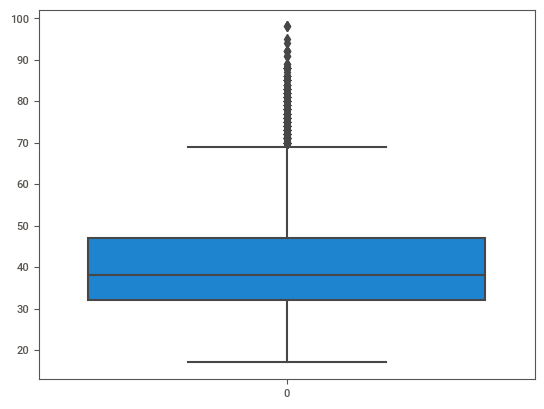

In [36]:
# Checking outliers in ['Age']
sns.boxplot(data['age'])

In [37]:
Q1 = data['age'].quantile(q=.25)
Q3 = data['age'].quantile(q=.75)
print('Q1 is: ', Q1)
print('Q3 is: ', Q3)

Q1 is:  32.0
Q3 is:  47.0


In [38]:
# IQR = Q3-Q1
# Lower 1.5*IQR  IS Q1-1.5*IQR
# Upper 1.5*IQR  IS Q3+1.5*IQR
l_outlier = Q1-1.5*(Q3-Q1)
u_outlier = Q3+1.5*(Q3-Q1)
print('l_outlier is: ', l_outlier)
print('u_outlier is: ', u_outlier)

l_outlier is:  9.5
u_outlier is:  69.5


In [39]:
# number of outliers

print('number of outliers in age upper: ', data[data['age']>69.5]['age'].count())
print('number of outliers in age lower: ',data[data['age']<9.5]['age'].count())

number of outliers in age upper:  469
number of outliers in age lower:  0


In [40]:
data.loc[data['age']>69.5]

age      job   marital            education  default housing loan  \
27713   70  retired  divorced             basic.4y       no     yes   no   
27757   76  retired   married    university.degree       no      no  yes   
27780   73  retired   married    university.degree       no     yes   no   
27800   88  retired  divorced             basic.4y       no     yes   no   
27802   88  retired  divorced             basic.4y       no      no   no   
...    ...      ...       ...                  ...      ...     ...  ...   
40986   84  retired  divorced             basic.4y  unknown     yes  yes   
40996   81  retired   married             basic.4y       no     yes   no   
41004   80  retired   married  professional.course       no     yes   no   
41183   73  retired   married  professional.course       no     yes   no   
41187   74  retired   married  professional.course       no     yes   no   

        contact month day_of_week  ...  campaign  pdays  previous  \
27713  cellular   mar         mon  ...         3    999         0   
27757  cellular   mar         thu  ...         9    999         0   
27780  cellular   mar         tue  ...         1    999         1   
27800  cellular   mar         wed  ...         1    999         0   
27802  cellular   mar         wed  ...         2    999         0   
...         ...   ...         ...  ...       ...    ...       ...   
40986  cellular   oct         mon  ...         4      3         1   
40996  cellular   oct         wed  ...         1    999         2   
41004  cellular   oct         thu  ...         1    999         1   
41183  cellular   nov         fri  ...         1    999         0   
41187  cellular   nov         fri  ...         3    999         1   

          poutcome emp_var_rate  cons_price_idx  cons_conf_idx  euribor3m  \
27713  nonexistent         -1.8          92.843          -50.0      1.811   
27757  nonexistent         -1.8          92.843          -50.0      1.757   
27780      failure         -1.8          92.843          -50.0      1.687   
27800  nonexistent         -1.8          92.843          -50.0      1.663   
27802  nonexistent         -1.8          92.843          -50.0      1.663   
...            ...          ...             ...            ...        ...   
40986      success         -1.1          94.601          -49.5      1.000   
40996      failure         -1.1          94.601          -49.5      1.016   
41004      failure         -1.1          94.601          -49.5      1.025   
41183  nonexistent         -1.1          94.767          -50.8      1.028   
41187      failure         -1.1          94.767          -50.8      1.028   

       nr_employed  y  
27713       5099.1  1  
27757       5099.1  0  
27780       5099.1  0  
27800       5099.1  0  
27802       5099.1  1  
...            ... ..  
40986       4963.6  0  
40996       4963.6  1  
41004       4963.6  1  
41183       4963.6  1  
41187       4963.6  0  

[469 rows x 21 columns]

In [41]:
median = data.loc[data['age']<69.5, 'age'].median()
median

38.0

In [42]:
data.loc[data.age>69.5, 'age']=np.nan
data['age'].fillna(data['age'].median(), inplace=True)

<Axes: >

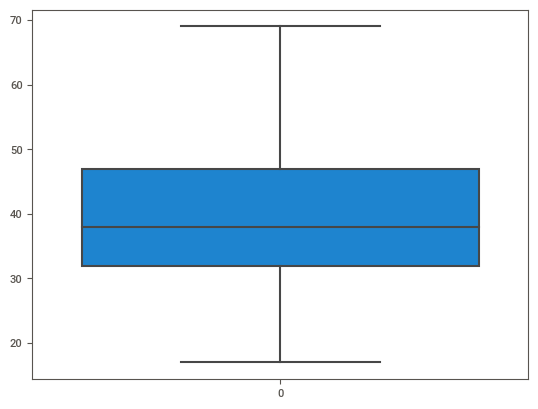

In [43]:
sns.boxplot(data['age'])

<Axes: >

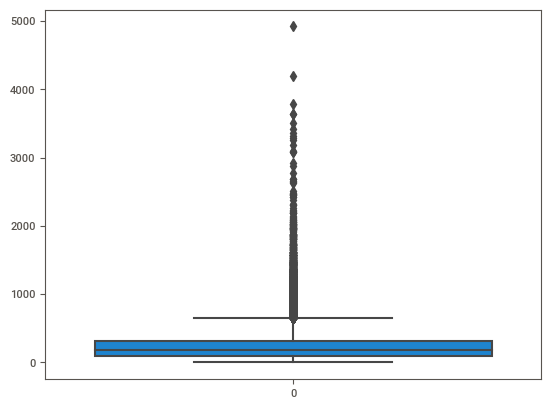

In [44]:
# checking outlier in duration
sns.boxplot(data['duration'])

In [45]:
# duration

Q1 = data['duration'].quantile(q=.25)
Q3 = data['duration'].quantile(q=.75)
print('Q1 is: ', Q1)
print('Q3 is: ', Q3)

Q1 is:  102.0
Q3 is:  319.0


In [46]:
# IQR = Q3-Q1
# LOWER = 1.5*IQR IS Q1-1.5*IQR
# UPPER = 1.5*IQR IS Q3+1.5*IQR
l_outlier = Q1-1.5*(Q3-Q1)
u_outlier = Q3+1.5*(Q3-Q1)
print('l_outlier is: ', l_outlier)
print('u_outlier is: ', u_outlier)

l_outlier is:  -223.5
u_outlier is:  644.5


In [47]:
print('Number of outlier in duration upper is: ', data[data['duration']>644.5]['duration'].count())
print('number of outlier in duration lower is: ', data[data['duration']<-223.5]['duration'].count())

Number of outlier in duration upper is:  2963
number of outlier in duration lower is:  0


In [48]:
data.loc[data['duration']>644.5]

age           job   marital            education  default housing  \
37     52.0    technician   married             basic.9y       no     yes   
57     45.0      services   married          high.school  unknown     yes   
61     51.0   blue-collar   married             basic.9y       no     yes   
75     41.0   blue-collar  divorced             basic.4y  unknown     yes   
83     49.0  entrepreneur   married    university.degree  unknown     yes   
...     ...           ...       ...                  ...      ...     ...   
41147  25.0    technician    single  professional.course       no     yes   
41153  67.0     housemaid  divorced  professional.course       no     yes   
41160  33.0        admin.   married    university.degree       no      no   
41164  54.0        admin.   married  professional.course       no      no   
41166  32.0        admin.   married    university.degree       no      no   

      loan    contact month day_of_week  ...  campaign  pdays  previous  \
37      no  telephone   may         mon  ...         1    999         0   
57      no  telephone   may         mon  ...         1    999         0   
61      no  telephone   may         mon  ...         1    999         0   
75      no  telephone   may         mon  ...         1    999         0   
83      no  telephone   may         mon  ...         1    999         0   
...    ...        ...   ...         ...  ...       ...    ...       ...   
41147   no   cellular   nov         fri  ...         2     19         1   
41153   no   cellular   nov         mon  ...         2      5         5   
41160   no   cellular   nov         tue  ...         1    999         0   
41164   no   cellular   nov         tue  ...         2     10         1   
41166   no  telephone   nov         wed  ...         1    999         1   

          poutcome emp_var_rate  cons_price_idx  cons_conf_idx  euribor3m  \
37     nonexistent          1.1          93.994          -36.4      4.857   
57     nonexistent          1.1          93.994          -36.4      4.857   
61     nonexistent          1.1          93.994          -36.4      4.857   
75     nonexistent          1.1          93.994          -36.4      4.857   
83     nonexistent          1.1          93.994          -36.4      4.857   
...            ...          ...             ...            ...        ...   
41147      success         -1.1          94.767          -50.8      1.040   
41153      success         -1.1          94.767          -50.8      1.039   
41160  nonexistent         -1.1          94.767          -50.8      1.035   
41164      success         -1.1          94.767          -50.8      1.035   
41166      failure         -1.1          94.767          -50.8      1.030   

       nr_employed  y  
37          5191.0  0  
57          5191.0  0  
61          5191.0  0  
75          5191.0  1  
83          5191.0  1  
...            ... ..  
41147       4963.6  1  
41153       4963.6  1  
41160       4963.6  1  
41164       4963.6  1  
41166       4963.6  1  

[2963 rows x 21 columns]

In [49]:
median = data.loc[data['duration']<644.5, 'duration'].median()
median

167.0

In [50]:
data.loc[data['duration']>644.5, 'duration']=np.nan
data['duration'].fillna(data['duration'].median(), inplace = True)

<Axes: >

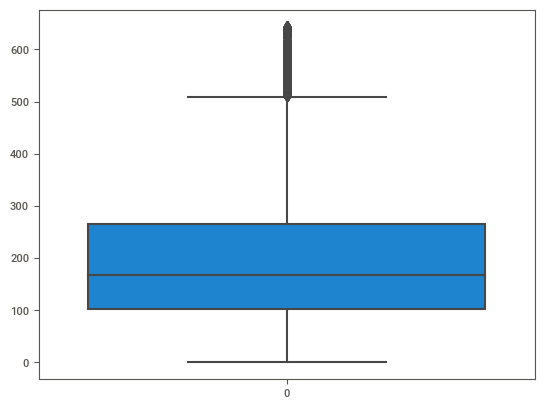

In [51]:
sns.boxplot(data['duration'])

<Axes: >

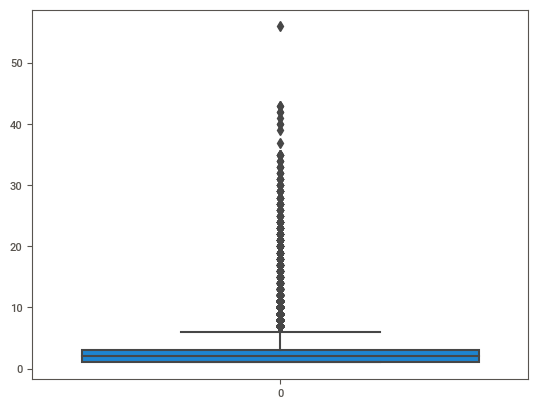

In [52]:
# Campaign 
sns.boxplot(data['campaign'])

In [53]:
Q1 = data['campaign'].quantile(q=.25)
Q3 = data['campaign'].quantile(q=.75)
print('Q1 is: ', Q1)
print('Q3 is: ', Q3)

Q1 is:  1.0
Q3 is:  3.0


In [54]:
# IQR =Q3-Q1
# LOWER = 1.5*IQR IS Q1-1.5*IQR
# UPPER = 1.5*IQR IS Q3-1.5*IQR
l_outlier = Q1- 1.5*(Q3-Q1)
u_outlier = Q3+ 1.5*(Q3-Q1)
print('l_outlier is: ', l_outlier)
print('u_outlier is: ', u_outlier)

l_outlier is:  -2.0
u_outlier is:  6.0


In [55]:
print('number of outlier in campaign upper is: ', data[data['campaign']>6.0]['campaign'].count())
print('number of outlier in camapaign lower is: ', data[data['campaign']<(-2.0)]['campaign'].count())

number of outlier in campaign upper is:  2406
number of outlier in camapaign lower is:  0


In [56]:
data.loc[data['campaign']>6.0]

age           job   marital            education  default housing  \
887    54.0        admin.   married    university.degree       no      no   
1043   41.0    technician    single    university.degree  unknown      no   
1094   40.0    technician   married  professional.course       no     yes   
1097   51.0   blue-collar   married             basic.4y  unknown     yes   
1230   48.0   blue-collar  divorced             basic.4y       no      no   
...     ...           ...       ...                  ...      ...     ...   
40611  38.0       retired   married             basic.9y       no      no   
40631  38.0       retired   married             basic.4y       no     yes   
40698  29.0    technician    single  professional.course       no     yes   
40821  33.0    technician    single  professional.course       no     yes   
40993  50.0  entrepreneur  divorced    university.degree       no     yes   

      loan    contact month day_of_week  ...  campaign  pdays  previous  \
887     no  telephone   may         wed  ...         7    999         0   
1043    no  telephone   may         wed  ...         8    999         0   
1094    no  telephone   may         wed  ...         8    999         0   
1097    no  telephone   may         wed  ...         7    999         0   
1230    no  telephone   may         thu  ...         7    999         0   
...    ...        ...   ...         ...  ...       ...    ...       ...   
40611   no  telephone   sep         fri  ...         9    999         1   
40631   no   cellular   sep         mon  ...         7    999         0   
40698   no   cellular   sep         mon  ...         7      3         5   
40821   no   cellular   sep         fri  ...         9    999         2   
40993   no  telephone   oct         tue  ...         7     11         2   

          poutcome emp_var_rate  cons_price_idx  cons_conf_idx  euribor3m  \
887    nonexistent          1.1          93.994          -36.4      4.856   
1043   nonexistent          1.1          93.994          -36.4      4.856   
1094   nonexistent          1.1          93.994          -36.4      4.856   
1097   nonexistent          1.1          93.994          -36.4      4.856   
1230   nonexistent          1.1          93.994          -36.4      4.855   
...            ...          ...             ...            ...        ...   
40611      failure         -1.1          94.199          -37.5      0.883   
40631  nonexistent         -1.1          94.199          -37.5      0.882   
40698      success         -1.1          94.199          -37.5      0.879   
40821      failure         -1.1          94.199          -37.5      0.879   
40993      success         -1.1          94.601          -49.5      1.008   

       nr_employed  y  
887         5191.0  0  
1043        5191.0  0  
1094        5191.0  0  
1097        5191.0  0  
1230        5191.0  0  
...            ... ..  
40611       4963.6  0  
40631       4963.6  0  
40698       4963.6  0  
40821       4963.6  0  
40993       4963.6  1  

[2406 rows x 21 columns]

In [57]:
median = data.loc[data['campaign']<6.0, 'campaign'].median()
median

2.0

In [58]:
data.loc[data['campaign']>6.0, 'campaign']=np.nan
data['campaign'].fillna(data['campaign'].median(), inplace=True)

<Axes: >

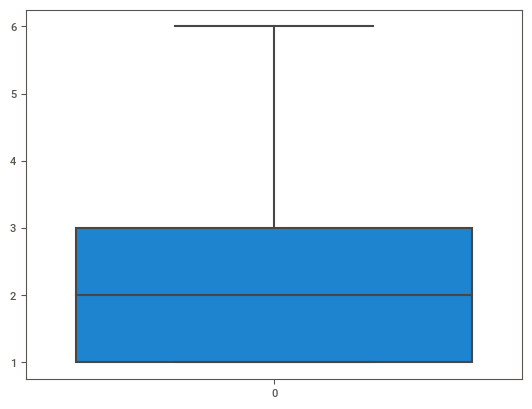

In [59]:
sns.boxplot(data['campaign'])

<Axes: >

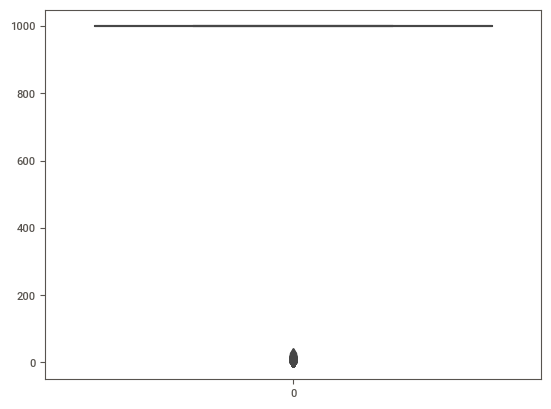

In [60]:
# Checking pdays
sns.boxplot(data['pdays'])

In [61]:
Q1 = data['pdays'].quantile(q=.25)
Q3 = data['pdays'].quantile(q=.75)
print('Q1 is: ', Q1)
print('Q3 is: ', Q3)

Q1 is:  999.0
Q3 is:  999.0


In [62]:
# IQR = Q3-Q1
# upper = 1.5*IQR IS Q3+1.5*IQR
# lower = 1.5*IQR IS Q1-1.5*IQR
l_outlier = Q3+1.5*(Q3-Q1)
u_outlier = Q1- 1.5*(Q3-Q1)
print('l_outlier is: ', l_outlier)
print('u_outlier is: ', u_outlier)

l_outlier is:  999.0
u_outlier is:  999.0


In [63]:
print('number of outlier in pdays upper is: ', data[data['pdays']>999.0]['pdays'].count())
print('number of outlier in pdays lower is: ', data[data['pdays']<999.0]['pdays'].count())

number of outlier in pdays upper is:  0
number of outlier in pdays lower is:  1515


In [64]:
data.loc[data['pdays']<999.0]

age            job   marital            education  default housing  \
24108  37.0         admin.   married    university.degree       no     yes   
24264  48.0     management   married    university.degree       no     yes   
24279  42.0     technician   married  professional.course  unknown     yes   
24397  50.0   entrepreneur   married    university.degree  unknown     yes   
24482  36.0  self-employed    single    university.degree       no     yes   
...     ...            ...       ...                  ...      ...     ...   
41163  35.0     technician  divorced             basic.4y       no     yes   
41164  54.0         admin.   married  professional.course       no      no   
41174  62.0        retired   married    university.degree       no     yes   
41178  62.0        retired   married    university.degree       no      no   
41182  29.0     unemployed    single             basic.4y       no     yes   

      loan    contact month day_of_week  ...  campaign  pdays  previous  \
24108   no  telephone   nov         wed  ...       1.0      6         1   
24264   no   cellular   nov         mon  ...       1.0      4         1   
24279   no   cellular   nov         mon  ...       1.0      4         1   
24397   no   cellular   nov         mon  ...       1.0      3         1   
24482   no   cellular   nov         mon  ...       2.0      4         1   
...    ...        ...   ...         ...  ...       ...    ...       ...   
41163   no   cellular   nov         tue  ...       3.0      4         2   
41164   no   cellular   nov         tue  ...       2.0     10         1   
41174   no   cellular   nov         thu  ...       1.0      1         6   
41178   no   cellular   nov         thu  ...       2.0      6         3   
41182   no   cellular   nov         fri  ...       1.0      9         1   

       poutcome emp_var_rate  cons_price_idx  cons_conf_idx  euribor3m  \
24108   success         -0.1          93.200          -42.0      4.286   
24264   success         -0.1          93.200          -42.0      4.191   
24279   success         -0.1          93.200          -42.0      4.191   
24397   success         -0.1          93.200          -42.0      4.191   
24482   success         -0.1          93.200          -42.0      4.191   
...         ...          ...             ...            ...        ...   
41163   success         -1.1          94.767          -50.8      1.035   
41164   success         -1.1          94.767          -50.8      1.035   
41174   success         -1.1          94.767          -50.8      1.031   
41178   success         -1.1          94.767          -50.8      1.031   
41182   success         -1.1          94.767          -50.8      1.028   

       nr_employed  y  
24108       5195.8  0  
24264       5195.8  0  
24279       5195.8  0  
24397       5195.8  0  
24482       5195.8  0  
...            ... ..  
41163       4963.6  1  
41164       4963.6  1  
41174       4963.6  1  
41178       4963.6  1  
41182       4963.6  0  

[1515 rows x 21 columns]

In [65]:
median = data.loc[data['pdays']<999.0, 'pdays'].median()
median

6.0

In [66]:
data.loc[data['pdays']<999.0, 'pdays']=np.nan
data['pdays'].fillna(data['pdays'].median(), inplace=True)

<Axes: >

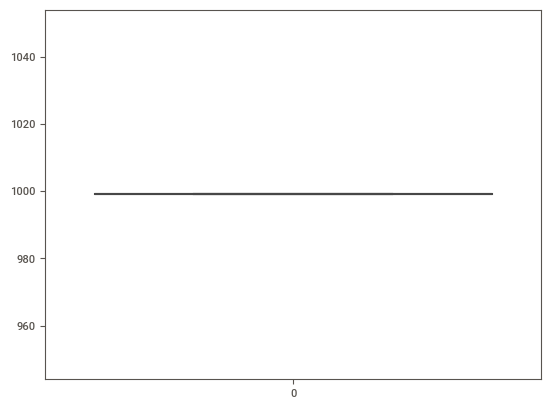

In [67]:
sns.boxplot(data['pdays'])

<Axes: >

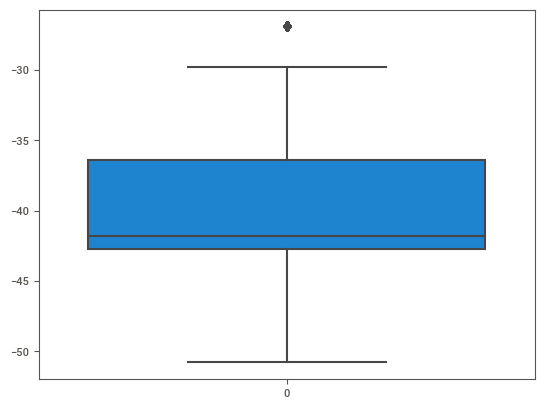

In [68]:
# Checking outlier in cons_conf_idx
sns.boxplot(data['cons_conf_idx'])

In [69]:
Q1 = data['cons_conf_idx'].quantile(.25)
Q3 = data['cons_conf_idx'].quantile(.75)
print('Q1 is: ', Q1)
print('Q3 is: ', Q3)

Q1 is:  -42.7
Q3 is:  -36.4


In [70]:
# IQR = Q3-Q1
# lower = 1.5*IQR is Q1-1.5*IQR
# upper = 1.5*IQR is Q3-1.5*IQR
l_outlier = Q1-1.5*(Q3-Q1)
u_outlier = Q3+1.5*(Q3-Q1)
print('l_outlier is: ', l_outlier)
print('u_outlier is: ', u_outlier)

l_outlier is:  -52.150000000000006
u_outlier is:  -26.949999999999992


In [71]:
print('number of lower outlier in cons_conf_idx is: ', data[data['cons_conf_idx']<(-52.150000000000006)]['cons_conf_idx'].count())
print('number of upper outlier in cons_conf_idx is: ', data[data['cons_conf_idx']>(-26.949999999999992)]['cons_conf_idx'].count())
      

number of lower outlier in cons_conf_idx is:  0
number of upper outlier in cons_conf_idx is:  447


In [72]:
data.loc[data['cons_conf_idx']> (-26.949999999999992)]

age         job   marital          education default housing loan  \
38154  50.0  management   married  university.degree      no     yes   no   
38155  37.0      admin.    single  university.degree      no     yes   no   
38156  59.0  technician    single           basic.6y      no      no   no   
38157  31.0      admin.   married  university.degree      no     yes   no   
38158  35.0      admin.   married        high.school      no     yes   no   
...     ...         ...       ...                ...     ...     ...  ...   
38596  69.0     retired   married           basic.4y      no     yes  yes   
38597  18.0     student    single           basic.6y      no      no  yes   
38598  59.0     retired  divorced           basic.4y      no     yes   no   
38599  37.0      admin.    single  university.degree      no      no   no   
38600  38.0     retired  divorced           basic.6y      no      no   no   

         contact month day_of_week  ...  campaign  pdays  previous  \
38154   cellular   oct         thu  ...       2.0  999.0         1   
38155   cellular   oct         thu  ...       3.0  999.0         0   
38156   cellular   oct         thu  ...       1.0  999.0         2   
38157   cellular   oct         thu  ...       1.0  999.0         0   
38158   cellular   oct         thu  ...       1.0  999.0         1   
...          ...   ...         ...  ...       ...    ...       ...   
38596   cellular   oct         fri  ...       3.0  999.0         0   
38597   cellular   oct         fri  ...       2.0  999.0         0   
38598  telephone   oct         fri  ...       4.0  999.0         0   
38599   cellular   oct         fri  ...       2.0  999.0         0   
38600  telephone   oct         fri  ...       2.0  999.0         0   

          poutcome emp_var_rate  cons_price_idx  cons_conf_idx  euribor3m  \
38154      success         -3.4          92.431          -26.9      0.754   
38155  nonexistent         -3.4          92.431          -26.9      0.754   
38156      failure         -3.4          92.431          -26.9      0.754   
38157  nonexistent         -3.4          92.431          -26.9      0.754   
38158      success         -3.4          92.431          -26.9      0.754   
...            ...          ...             ...            ...        ...   
38596  nonexistent         -3.4          92.431          -26.9      0.720   
38597  nonexistent         -3.4          92.431          -26.9      0.720   
38598  nonexistent         -3.4          92.431          -26.9      0.720   
38599  nonexistent         -3.4          92.431          -26.9      0.720   
38600  nonexistent         -3.4          92.431          -26.9      0.720   

       nr_employed  y  
38154       5017.5  1  
38155       5017.5  1  
38156       5017.5  0  
38157       5017.5  0  
38158       5017.5  1  
...            ... ..  
38596       5017.5  1  
38597       5017.5  1  
38598       5017.5  0  
38599       5017.5  1  
38600       5017.5  0  

[447 rows x 21 columns]

In [73]:
median= data.loc[data['cons_conf_idx']<(-26.949999999999992),'cons_conf_idx'].median()
median

-41.8

In [74]:
data.loc[data['cons_conf_idx']>(-26.949999999999992), 'cons_conf_idx']=np.nan
data['cons_conf_idx'].fillna(data['cons_conf_idx'].median(), inplace=True)

<Axes: >

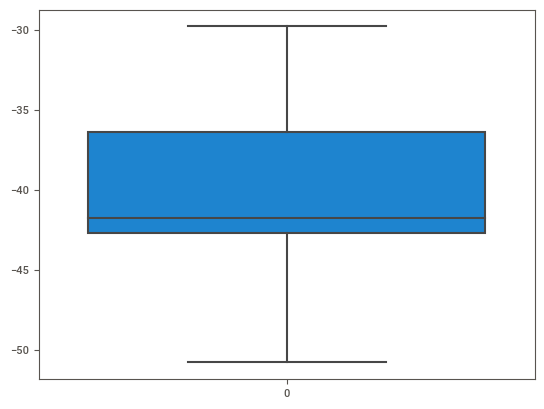

In [75]:
sns.boxplot(data['cons_conf_idx'])

## Converting all categorical data to numerical 

In [76]:
data

age          job  marital            education  default housing loan  \
0      56.0    housemaid  married             basic.4y       no      no   no   
1      57.0     services  married          high.school  unknown      no   no   
2      37.0     services  married          high.school       no     yes   no   
3      40.0       admin.  married             basic.6y       no      no   no   
4      56.0     services  married          high.school       no      no  yes   
...     ...          ...      ...                  ...      ...     ...  ...   
41183  38.0      retired  married  professional.course       no     yes   no   
41184  46.0  blue-collar  married  professional.course       no      no   no   
41185  56.0      retired  married    university.degree       no     yes   no   
41186  44.0   technician  married  professional.course       no      no   no   
41187  38.0      retired  married  professional.course       no     yes   no   

         contact month day_of_week  ...  campaign  pdays  previous  \
0      telephone   may         mon  ...       1.0  999.0         0   
1      telephone   may         mon  ...       1.0  999.0         0   
2      telephone   may         mon  ...       1.0  999.0         0   
3      telephone   may         mon  ...       1.0  999.0         0   
4      telephone   may         mon  ...       1.0  999.0         0   
...          ...   ...         ...  ...       ...    ...       ...   
41183   cellular   nov         fri  ...       1.0  999.0         0   
41184   cellular   nov         fri  ...       1.0  999.0         0   
41185   cellular   nov         fri  ...       2.0  999.0         0   
41186   cellular   nov         fri  ...       1.0  999.0         0   
41187   cellular   nov         fri  ...       3.0  999.0         1   

          poutcome emp_var_rate  cons_price_idx  cons_conf_idx  euribor3m  \
0      nonexistent          1.1          93.994          -36.4      4.857   
1      nonexistent          1.1          93.994          -36.4      4.857   
2      nonexistent          1.1          93.994          -36.4      4.857   
3      nonexistent          1.1          93.994          -36.4      4.857   
4      nonexistent          1.1          93.994          -36.4      4.857   
...            ...          ...             ...            ...        ...   
41183  nonexistent         -1.1          94.767          -50.8      1.028   
41184  nonexistent         -1.1          94.767          -50.8      1.028   
41185  nonexistent         -1.1          94.767          -50.8      1.028   
41186  nonexistent         -1.1          94.767          -50.8      1.028   
41187      failure         -1.1          94.767          -50.8      1.028   

       nr_employed  y  
0           5191.0  0  
1           5191.0  0  
2           5191.0  0  
3           5191.0  0  
4           5191.0  0  
...            ... ..  
41183       4963.6  1  
41184       4963.6  0  
41185       4963.6  0  
41186       4963.6  1  
41187       4963.6  0  

[41188 rows x 21 columns]

In [77]:
df=data.copy()

In [78]:
df['job'].replace(['housemaid','services','admin.', 'blue-collar', 'technician' ,'retired','management', 'unemployed', 'self-employed', 'unknown' ,'entrepreneur','student'],[0,1,2,3,4,5,6,7,8,9,10,11],inplace=True)
df['default'].replace([ 'no','yes','unknown'],[7,8,9], inplace=True)
df['education'].replace(['basic.4y','basic.6y','basic.9y','professional.course', 'unknown', 'high.school','university.degree','illiterate'],[3,2,0,1,4,5,6,7],inplace=True)
df['marital'].replace([ 'divorced','married','single','unknown'],[10,11,12,13], inplace=True)
df['housing'].replace(['no','yes','unknown'],[15,16,17], inplace=True)
df['loan'].replace([ 'no','yes','unknown'],[0,2,4], inplace=True)
df['contact'].replace([ 'cellular','telephone'], [7,9], inplace=True)
df['month'].replace(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb', 'mar', 'apr', 'sep'],[5,6,7,8,10,11,12,1,2,3,4,9],inplace=True)
df['day_of_week'].replace([ 'mon','tue','wed','thu','fri'], [7,6,5,4,3], inplace=True)
df['poutcome'].replace(['failure','nonexistent','success'],[4,2,7], inplace=True)


In [79]:
df

age  job  marital  education  default  housing  loan  contact  month  \
0      56.0    0       11          3        7       15     0        9      5   
1      57.0    1       11          5        9       15     0        9      5   
2      37.0    1       11          5        7       16     0        9      5   
3      40.0    2       11          2        7       15     0        9      5   
4      56.0    1       11          5        7       15     2        9      5   
...     ...  ...      ...        ...      ...      ...   ...      ...    ...   
41183  38.0    5       11          1        7       16     0        7     11   
41184  46.0    3       11          1        7       15     0        7     11   
41185  56.0    5       11          6        7       16     0        7     11   
41186  44.0    4       11          1        7       15     0        7     11   
41187  38.0    5       11          1        7       16     0        7     11   

       day_of_week  ...  campaign  pdays  previous  poutcome  emp_var_rate  \
0                7  ...       1.0  999.0         0         2           1.1   
1                7  ...       1.0  999.0         0         2           1.1   
2                7  ...       1.0  999.0         0         2           1.1   
3                7  ...       1.0  999.0         0         2           1.1   
4                7  ...       1.0  999.0         0         2           1.1   
...            ...  ...       ...    ...       ...       ...           ...   
41183            3  ...       1.0  999.0         0         2          -1.1   
41184            3  ...       1.0  999.0         0         2          -1.1   
41185            3  ...       2.0  999.0         0         2          -1.1   
41186            3  ...       1.0  999.0         0         2          -1.1   
41187            3  ...       3.0  999.0         1         4          -1.1   

       cons_price_idx  cons_conf_idx  euribor3m  nr_employed  y  
0              93.994          -36.4      4.857       5191.0  0  
1              93.994          -36.4      4.857       5191.0  0  
2              93.994          -36.4      4.857       5191.0  0  
3              93.994          -36.4      4.857       5191.0  0  
4              93.994          -36.4      4.857       5191.0  0  
...               ...            ...        ...          ... ..  
41183          94.767          -50.8      1.028       4963.6  1  
41184          94.767          -50.8      1.028       4963.6  0  
41185          94.767          -50.8      1.028       4963.6  0  
41186          94.767          -50.8      1.028       4963.6  1  
41187          94.767          -50.8      1.028       4963.6  0  

[41188 rows x 21 columns]

In [80]:
X=df.drop(columns=['y'])
Y=df['y']

In [81]:
X

age  job  marital  education  default  housing  loan  contact  month  \
0      56.0    0       11          3        7       15     0        9      5   
1      57.0    1       11          5        9       15     0        9      5   
2      37.0    1       11          5        7       16     0        9      5   
3      40.0    2       11          2        7       15     0        9      5   
4      56.0    1       11          5        7       15     2        9      5   
...     ...  ...      ...        ...      ...      ...   ...      ...    ...   
41183  38.0    5       11          1        7       16     0        7     11   
41184  46.0    3       11          1        7       15     0        7     11   
41185  56.0    5       11          6        7       16     0        7     11   
41186  44.0    4       11          1        7       15     0        7     11   
41187  38.0    5       11          1        7       16     0        7     11   

       day_of_week  duration  campaign  pdays  previous  poutcome  \
0                7     261.0       1.0  999.0         0         2   
1                7     149.0       1.0  999.0         0         2   
2                7     226.0       1.0  999.0         0         2   
3                7     151.0       1.0  999.0         0         2   
4                7     307.0       1.0  999.0         0         2   
...            ...       ...       ...    ...       ...       ...   
41183            3     334.0       1.0  999.0         0         2   
41184            3     383.0       1.0  999.0         0         2   
41185            3     189.0       2.0  999.0         0         2   
41186            3     442.0       1.0  999.0         0         2   
41187            3     239.0       3.0  999.0         1         4   

       emp_var_rate  cons_price_idx  cons_conf_idx  euribor3m  nr_employed  
0               1.1          93.994          -36.4      4.857       5191.0  
1               1.1          93.994          -36.4      4.857       5191.0  
2               1.1          93.994          -36.4      4.857       5191.0  
3               1.1          93.994          -36.4      4.857       5191.0  
4               1.1          93.994          -36.4      4.857       5191.0  
...             ...             ...            ...        ...          ...  
41183          -1.1          94.767          -50.8      1.028       4963.6  
41184          -1.1          94.767          -50.8      1.028       4963.6  
41185          -1.1          94.767          -50.8      1.028       4963.6  
41186          -1.1          94.767          -50.8      1.028       4963.6  
41187          -1.1          94.767          -50.8      1.028       4963.6  

[41188 rows x 20 columns]

### Scaling the data

In [82]:
# Scaling the data as all feature seems to be near to normal distribution

from sklearn.preprocessing import StandardScaler
Scaler= StandardScaler() # object creation
X_scaled = Scaler.fit_transform(X)

In [83]:
X_scaled

array([[ 1.70658113, -1.49696895, -0.2837415 , ...,  0.9680674 ,
         0.71245988,  0.33167991],
       [ 1.81051927, -1.08948536, -0.2837415 , ...,  0.9680674 ,
         0.71245988,  0.33167991],
       [-0.26824358, -1.08948536, -0.2837415 , ...,  0.9680674 ,
         0.71245988,  0.33167991],
       ...,
       [ 1.70658113,  0.540449  , -0.2837415 , ..., -2.30096943,
        -1.49518647, -2.8156966 ],
       [ 0.45932342,  0.13296541, -0.2837415 , ..., -2.30096943,
        -1.49518647, -2.8156966 ],
       [-0.16430544,  0.540449  , -0.2837415 , ..., -2.30096943,
        -1.49518647, -2.8156966 ]])

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test ,Y_train, Y_test =train_test_split(X_scaled,Y, test_size=0.25, random_state=42 )

## MODEL CREATION

### LOGISTIC REGRESSION

In [85]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

log_reg.fit(X_train,Y_train)

LogisticRegression()

In [86]:
# Predicting Y_train
Y_train_pred = log_reg.predict(X_train) 
Y_train_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [87]:
# Testing model
Y_pred = log_reg.predict(X_test)

In [88]:
Y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [89]:
# Known the shape 
Y_train.shape

(30891,)

In [90]:
Y_pred.shape

(10297,)

## CALCULATING ACCURACY

In [91]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score,classification_report
accuracy = accuracy_score(Y_train, Y_train_pred)
accuracy

0.9033051697905539

#### In logistic regression algorithm got 90% accuracy

# KNN

In [92]:
from imblearn.over_sampling import SMOTE
smote=SMOTE() # Object creatuin


In [93]:
X_train_smote, Y_train_smote = smote.fit_resample(X_train.astype('float'),Y_train)

In [94]:
from collections import Counter
print('Actual classes', Counter(Y_train))
print('Actual classes', Counter(Y_train_smote))

Actual classes Counter({0: 27404, 1: 3487})
Actual classes Counter({0: 27404, 1: 27404})


In [95]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_smote, Y_train_smote)

KNeighborsClassifier(n_neighbors=7)

In [96]:
Y_pred = knn.predict(X_test)

In [97]:
error_rate = []
for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_smote,Y_train_smote)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != Y_test))

Text(0, 0.5, 'Error Rate')

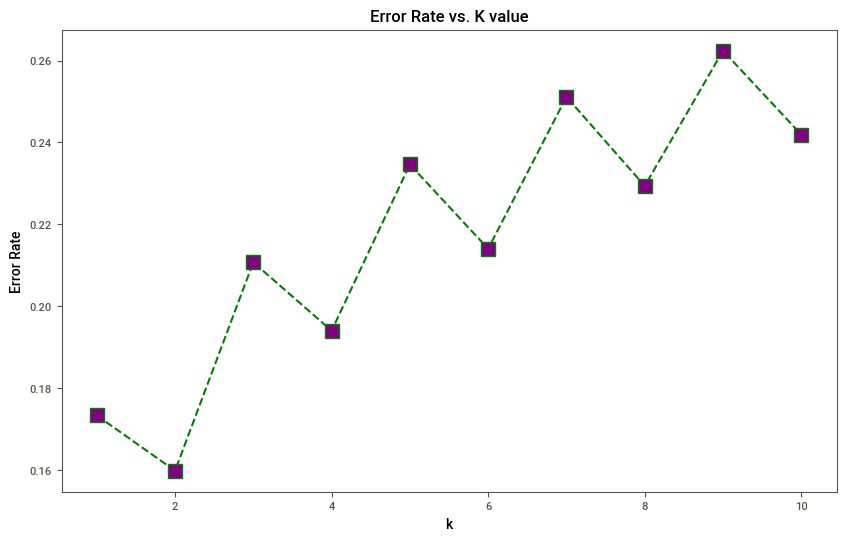

In [98]:
plt.figure(figsize=(10,6))
plt.plot(range(1,11),error_rate,color='green',linestyle='dashed',marker='s',markerfacecolor='purple',markersize=10)
plt.title('Error Rate vs. K value')
plt.xlabel('k')
plt.ylabel('Error Rate')

In [99]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_smote,Y_train_smote)
Y_pred=knn.predict(X_test)

In [100]:
print("The accuracy score is : ", accuracy_score(Y_test,Y_pred))

The accuracy score is :  0.7653685539477517


### Knn got 76% accuracy

# SVM

In [101]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(X_train,Y_train)

SVC()

In [102]:
Y_pred_sv=svm.predict(X_test)

In [103]:
print(accuracy_score(Y_test,Y_pred_sv))

0.9052151111974361


### SVM got 91% performance

# RANDOM FOREST 

In [104]:
from sklearn.ensemble import RandomForestClassifier
R_forest = RandomForestClassifier()
R_forest.fit(X_train,Y_train)

RandomForestClassifier()

In [105]:
Y_pred = R_forest.predict(X_test)
Y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [106]:
(Y_test == Y_pred).sum()/len(Y_test)*100

90.96824317762456

In [107]:
print('accuracy_score is: ', accuracy_score(Y_test,Y_pred))

accuracy_score is:  0.9096824317762455


###  Random forest got 91%

# XG BOOSTER

In [108]:
from sklearn.ensemble import GradientBoostingClassifier
XGB = GradientBoostingClassifier()
XGB.fit(X_train,Y_train)

GradientBoostingClassifier()

In [109]:
Y_pred = XGB.predict(X_test)
Y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [110]:
print('Accuracy_score is: ', accuracy_score(Y_test, Y_pred))

Accuracy_score is:  0.9119160920656502


### XGB is got 92% performance

# DECISION TREE

In [111]:
from sklearn.tree import DecisionTreeClassifier
d_tree = DecisionTreeClassifier()
d_tree.fit(X_train,Y_train)

DecisionTreeClassifier()

In [112]:
Y_pred = d_tree.predict(X_test)
Y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [113]:
accuracy = accuracy_score(Y_test,Y_pred)
accuracy

0.8877342915412256

In [114]:
from sklearn.metrics import classification_report,accuracy_score,f1_score,recall_score

In [115]:
CR = classification_report(Y_test,Y_pred)
CR

'              precision    recall  f1-score   support\n\n           0       0.94      0.93      0.94      9144\n           1       0.50      0.52      0.51      1153\n\n    accuracy                           0.89     10297\n   macro avg       0.72      0.72      0.72     10297\nweighted avg       0.89      0.89      0.89     10297\n'

In [116]:
F1_score = f1_score(Y_test,Y_pred)

In [117]:
F1_score

0.5068259385665529

### Decision tree got 88% accuracy

# CONCLUSION

### In Machine Learning Project,First:-  I have focused on one of the most important part that is EDA(Exploratory data analysis). This is very important procedure to understand the data.

### Second Focus on Feature engineering and feature selection, cleaning the dataset and taking care of anomalies. we find along the way as well as imputations and transformation

### Third we use different machine learning algorithm to predict the dataset. like:- Logistic regression, SVM, KNN, Decision Tree, Random Forest and XG Booster. 

### We got maximum in XG BOOSTER, GOT 92%.

In [118]:
pwd

'C:\\Users\\amanp\\Protughees Bank project'